## Homework #5. Crowdsourcing tools review
#### Author: `Yuliia Verbivska`
#### Total time spent on h/w (in minutes): `3452 години`

In [180]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import mplcairo
mpl.use("module://mplcairo.tk")
%matplotlib inline
import numpy as np
import pandas as pd
import datetime

In [181]:
from wordcloud import WordCloud, STOPWORDS
import advertools as adv

In [182]:
import warnings
warnings.filterwarnings('ignore')

In [183]:
DIALOGS_MERGED_DATA_PATH = "D:/Naukma/DS/telegram-data-collection-master/data/merged_data/dialogs_data_all.csv"
DIALOGS_META_MERGED_DATA_PATH = "D:/Naukma/DS/telegram-data-collection-master/data/merged_data/dialogs_users_all.csv"

In [184]:
df = pd.read_csv(DIALOGS_MERGED_DATA_PATH, dtype={'from_id':str, 'to_id':str, 'date':str})
df_meta = pd.read_csv(DIALOGS_META_MERGED_DATA_PATH)
df

,id,date,from_id,to_id,fwd_from,message,type,duration,dialog_id
0,51085,2022-04-10 19:05:00+00:00,NaN,PeerChannel(channel_id=1049320233),NaN,А може й більше,photo,NaN,-1001049320233
1,51083,2022-04-10 18:53:28+00:00,NaN,PeerChannel(channel_id=1049320233),NaN,NaN,photo,NaN,-1001049320233
2,51082,2022-04-10 18:27:27+00:00,NaN,PeerChannel(channel_id=1049320233),"MessageFwdHeader(date=datetime.datetime(2022, ...",⚡️Макрон о результатах экзит-пола по отношению...,text,NaN,-1001049320233
3,51081,2022-04-10 18:13:16+00:00,NaN,PeerChannel(channel_id=1049320233),"MessageFwdHeader(date=datetime.datetime(2022, ...",Битва за кожне місто і село нашої країни варта...,video,119.0,-1001049320233
4,51080,2022-04-10 18:02:41+00:00,NaN,PeerChannel(channel_id=1049320233),NaN,Макрон - 28%\nЛе Пен - 23%,text,NaN,-1001049320233
...,...,...,...,...,...,...,...,...,...
1190069,358045,2021-06-11 19:07:15+00:00,PeerUser(user_id=342667961),970766368,NaN,NaN,photo,NaN,970766368
1190070,358044,2021-06-11 19:07:15+00:00,PeerUser(user_id=342667961),970766368,NaN,NaN,photo,NaN,970766368
1190071,358043,2021-06-11 19:07:15+00:00,PeerUser(user_id=342667961),970766368,NaN,NaN,photo,NaN,970766368
1190072,358042,2021-06-11 19:07:15+00:00,PeerUser(user_id=342667961),970766368,NaN,NaN,photo,NaN,970766368


In [185]:
df_meta


,dialog_id,name,type,users
0,-1001124109395,Філіал КМЦ,Group,"{'user_id': 353330283, 'first_name': 'Полковни..."
1,-1001124109395,Філіал КМЦ,Group,"{'user_id': 230295237, 'first_name': 'Валентий..."
2,-1001124109395,Філіал КМЦ,Group,"{'user_id': 544701196, 'first_name': 'Ярослав'..."
3,-1001124109395,Філіал КМЦ,Group,"{'user_id': 455550602, 'first_name': 'Андрійко..."
4,-1001124109395,Філіал КМЦ,Group,"{'user_id': 478826760, 'first_name': 'Баглей',..."
...,...,...,...,...
7259,726008022,filosof,Private dialog,"{'user_id': 726008022, 'first_name': 'filosof'..."
7260,765503081,Oleksiy Kashpirovskiy,Private dialog,"{'user_id': 765503081, 'first_name': 'Oleksiy'..."
7261,770605699,Yulia Stoliaruk,Private dialog,"{'user_id': 770605699, 'first_name': 'Yulia', ..."
7262,817903784,annna,Private dialog,"{'user_id': 817903784, 'first_name': 'annna', ..."


In [186]:
chat_users = {}
for dialog in df_meta['dialog_id']:
    users = []
    for user in df_meta[df_meta['dialog_id']==dialog]['users']:
        users.append(user)
    chat_users[dialog] = users

In [187]:
df_merged = df_meta.copy()
users = []
for dialog in df_merged['dialog_id']:
    users.append(chat_users[dialog])

df_merged['users'] = users
df_merged = df_merged.drop_duplicates(subset = 'dialog_id', keep = 'first')
df_merged = pd.merge(df, df_merged, on = "dialog_id")
df_merged.rename(columns = {'type_x':'type_message', 'type_y':'type_dialog'}, inplace = True)

In [188]:
df_meta.head(1)

,dialog_id,name,type,users
0,-1001124109395,Філіал КМЦ,Group,"{'user_id': 353330283, 'first_name': 'Полковни..."


In [189]:
df_merged.head(10)

,id,date,from_id,to_id,fwd_from,message,type_message,duration,dialog_id,name,type_dialog,users
0,699051,2022-04-08 16:02:57+00:00,PeerUser(user_id=312918817),PeerChannel(channel_id=1124109395),NaN,NaN,text,NaN,-1001124109395,Філіал КМЦ,Group,"[{'user_id': 353330283, 'first_name': 'Полковн..."
1,699050,2022-04-06 18:52:12+00:00,PeerUser(user_id=255144521),PeerChannel(channel_id=1124109395),"MessageFwdHeader(date=datetime.datetime(2022, ...","Шановні колеги та друзі, звертаюсь до Вас про ...",photo,NaN,-1001124109395,Філіал КМЦ,Group,"[{'user_id': 353330283, 'first_name': 'Полковн..."
2,699049,2022-04-01 13:11:54+00:00,PeerUser(user_id=255144521),PeerChannel(channel_id=1124109395),"MessageFwdHeader(date=datetime.datetime(2022, ...",Волонтерство на державній платформі СпівДія - ...,photo,NaN,-1001124109395,Філіал КМЦ,Group,"[{'user_id': 353330283, 'first_name': 'Полковн..."
3,699048,2022-03-19 14:33:39+00:00,PeerUser(user_id=255144521),PeerChannel(channel_id=1124109395),"MessageFwdHeader(date=datetime.datetime(2022, ...",Завтра 20.03.2022 р. орієнтовно після обіду з ...,text,NaN,-1001124109395,Філіал КМЦ,Group,"[{'user_id': 353330283, 'first_name': 'Полковн..."
4,699047,2022-03-18 15:28:00+00:00,PeerUser(user_id=255144521),PeerChannel(channel_id=1124109395),"MessageFwdHeader(date=datetime.datetime(2022, ...","❗️Друзі, завтра 19.03 о 9:00 виїжджатимуть авт...",text,NaN,-1001124109395,Філіал КМЦ,Group,"[{'user_id': 353330283, 'first_name': 'Полковн..."
5,699046,2022-03-16 18:40:22+00:00,PeerUser(user_id=5223568697),PeerChannel(channel_id=1124109395),NaN,NaN,text,NaN,-1001124109395,Філіал КМЦ,Group,"[{'user_id': 353330283, 'first_name': 'Полковн..."
6,699045,2022-03-16 17:49:45+00:00,PeerUser(user_id=255144521),PeerChannel(channel_id=1124109395),"MessageFwdHeader(date=datetime.datetime(2022, ...",Привіт. Якщо хтось має час та бажання допомогт...,text,NaN,-1001124109395,Філіал КМЦ,Group,"[{'user_id': 353330283, 'first_name': 'Полковн..."
7,699044,2022-03-14 19:11:40+00:00,PeerUser(user_id=255144521),PeerChannel(channel_id=1124109395),NaN,"Панове, привіт!\n\nВ мене зараз друг займаєтьс...",text,NaN,-1001124109395,Філіал КМЦ,Group,"[{'user_id': 353330283, 'first_name': 'Полковн..."
8,699043,2022-03-13 10:44:44+00:00,PeerUser(user_id=255144521),PeerChannel(channel_id=1124109395),"MessageFwdHeader(date=datetime.datetime(2022, ...","Ребят, нужны контакты глав волонтёрских групп ...",text,NaN,-1001124109395,Філіал КМЦ,Group,"[{'user_id': 353330283, 'first_name': 'Полковн..."
9,699042,2022-03-10 15:06:02+00:00,PeerUser(user_id=1347119114),PeerChannel(channel_id=1124109395),NaN,Колеги @thegreatpretender @annagnatenkoo @bogd...,text,NaN,-1001124109395,Філіал КМЦ,Group,"[{'user_id': 353330283, 'first_name': 'Полковн..."


## Questions to data

1. Найбільш вживані мною слова( ворклауд )
- загалом +
- в чаті з кимось близьким +
2. Найбільш активний час використання додатку протягом доби
- за годинами +
- за проміжками у 6 годин +
3. Помісячні зміни кількості повідомлень протягом 2-ох років і кореляція цих змін з подіями в моєму житі+
4. Найбільш вживані мною і моїми близькими друзями емодзі та стікери+
5. Люди, які частіше пишуть першими мені, а не я їм+
6. Люди, яким я пишу частіше, аніж вони мені+
7. Переважаючі емоції в чатах
- вплив депресії 
- переважаюче емоційне забарвлення в 5 чатах, у які я найбільше писала
8. Як змінювалися близькі мені люди протягом 2-ох років( за кількістю повідомлень )+
9. Збільшення кількості повідомлень українською за весь час+
10. Зміна кількості повідомлень українською та російською за 2 роки+
11. Зміна кількості російськомовних та україномовних відправників повідомлень з часом/корреляція з війною та вступом у Могилянку

13. Кількість людей у яких недоступний номер телефону+
14. Порівняння найбільш вживаних мною та Наташею слів у нашому чаті+
15. З ким я найбільше спілкуюся? З особами жіночої чи чоловічої статі?
16. Як змінювалися смішки(https://python-graph-gallery.com/125-small-multiples-for-line-chart)+
17. Який смішок найбільш поширеший(пай чарт)+
18. Найбільш вживані мною слова барчарт+
19. Помісячні зміни моїх найвживаніших слів ( https://python-graph-gallery.com/web-highlighted-lineplot-with-faceting )
20. Ключові слова у чатах 

In [246]:
my_id_short = ''
my_id = f'PeerUser(user_id={my_id_short})'
my_bestfriend_id_short = ''
my_bestfriend_id = f'PeerUser(user_id={my_bestfriend_id_short})'

## Питання пов'язані з кількістю найбільш вживаних слів

Стопслова

In [247]:
ukrainian_stopwords = list(adv.stopwords['ukrainian'])+ ['і', "ж", "й", "ага", "хочу", "наче", "завтра", "щось", "взагалі", "мабуть", "точно",'блін', 
                            'можу', 'якось', 'якби','хотіла','пізда', 'всі', 'після','щодо', "десь", "тобто", "всім", "всіх", "має", "нема",
                            "можливо", 'насправді','можеш', 'робити', 'речі','зробити' ]
russian_stopwords = list(adv.stopwords['russian'])+['типу', 'вроде','тоже','очень','что-то', 'вообще','ладно','потому','сейчас', "короче",
                        "точно",'блять','бля','надо', 'блин', 'давай', 'тогда', 'потом', 'нужно', 'наверное', 'хочешь','хотела', 'ведь',
                        "похуй", 'хоть', "таки", "ибо", "где", "какой", "хотя", "совсем", "зато", "какая", "именно", 
                        'кстати', "после", "даже", "почти", 'нахуй', "сука", 'кажется', "скорее", "общем", "где-то", "немного",
                        "много", "теперь", 'лучше', "больше", "иногда", "равно",'/dick@kraft28_bot', 'nan']
english_stopwords = ['the', 'int', 'new', 'public', 'private', 'return', 'and', 'double','else', 'for','item','not','null','s.charat(i)','string','void']
stopwords = ukrainian_stopwords + russian_stopwords + english_stopwords

In [248]:
# розбиває серію з повідомлень на слова і подає їх у вигляді list
def split_msg_to_words(my_messages):
    word_list = []
    for msg in my_messages:
        words=str(msg).split()
        for word in words:
            word = word.lower().replace(",", "").replace('?','')
            if len(word)>2 and word!='nan' and word not in stopwords:
                word_list.append(word)
    return word_list

Усі повідомлення, які надсилала я 

In [249]:
my_messages = df[(df.from_id == my_id) & (df.type == 'text')]['message']

## 1. WordCloud 

In [250]:
from PIL import Image

cloud_mask = np.array(Image.open("D:/Naukma/DS/Hw/telegram-dialogs-analysis-v2-main/cloud.png"))
heart_mask = np.array(Image.open("D:/Naukma/DS/Hw/telegram-dialogs-analysis-v2-main/heart.png"))
monkey_mask = np.array(Image.open("D:/Naukma/DS/Hw/telegram-dialogs-analysis-v2-main/monkey.png"))

In [254]:
# створює хмару слів
def make_wordcloud(word_list,amount, mask):
    wordcloud = WordCloud(width = 800, height = 800,
                colormap='plasma',
                background_color ='white',
                stopwords = stopwords,
                max_words = amount,
                min_font_size = 10,
                mask = mask).generate(" ".join(word_list))
 
    # plot the WordCloud image                      
    plt.figure(figsize = (6, 6), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
 
    plt.show()

### З повідомлень, які надсилала я
- в усіх чатах 

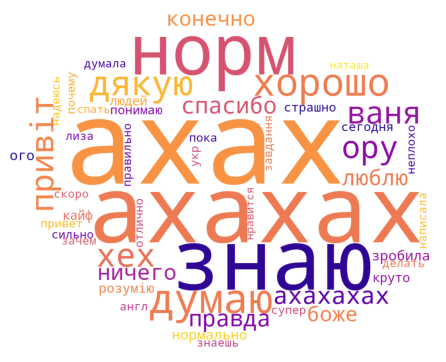

In [255]:
make_wordcloud(split_msg_to_words(my_messages), 50, cloud_mask)

- у чаті з моєю подругою 

In [197]:
my_messages_to_friend = df[(df.from_id == my_id) &(df.to_id==f'{my_bestfriend_id_short}') & (df.type == 'text')]['message']

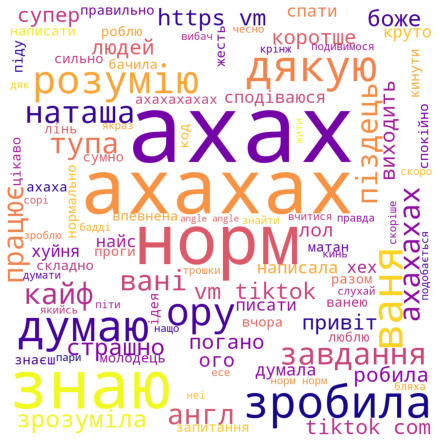

In [198]:
make_wordcloud(split_msg_to_words(my_messages_to_friend),100,heart_mask)

- повідомлення від усіх відправників у чаті Прикладної математики

In [199]:
prymaty_messages = df[(df.dialog_id ==-1001260680685) & (df.type == 'text')]['message']

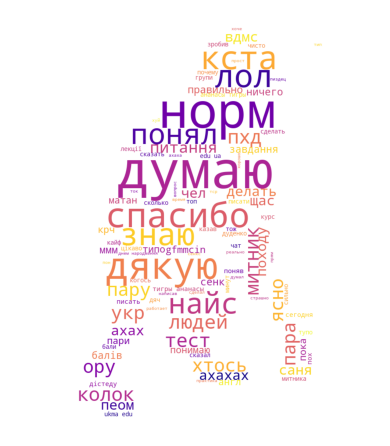

In [200]:
make_wordcloud(split_msg_to_words(prymaty_messages),100, monkey_mask)

Як можна побачити, я досить часто позначаю нашу старосту у чаті, вітаю когось з днем народження, а також активно запитувала/допомагала з ER-діаграмами. Багато говорю про навчання та систему.

In [201]:
# повертає найбільш вживані слова з кількістю їхнього вживання 
def most_occur(word_list, amount):
    from collections import Counter
    Counter = Counter(word_list)
    return Counter.most_common(amount)

- палетки кольорів

In [202]:
color_palette = ['#5c2751', '#5D2D5C', '#603F7C', '#6457A6', 
                  '#8182D3', '#8F97E9', '#8AC9FE', '#76E5FC',
                  "#61D3EB",'#4BC0D9']

# dark blue color palette
dark_blue_palette = ['#042A2B', '#0F3637','#1B4C50', '#316E75', '#48909A',
                  '#53A1AD', '#5EB1BF', '#7AC0CD', '#96CFDB',
                  '#B1DBE4']

# bright colors: from deep purple to green with orange 
bright_palette = ['#8B4E76', '#BD4B73', '#D64971', '#EF476F', '#F4756C',
                  '#FAA369', '#FFD166', '#C1D375', '#83D483',
                  '#06D6A0', '#33DDB1']

blue_pink_palette = ['#C9DDFF', '#D2D2F8', '#D7CDF4', '#DBC7F0', '#E4BCE9', '#ECB0E1', '#E797BE',
                     '#E58AAD', '#E27D9B', '#E0758F', '#DF7189', '#DE6C83', '#D88097', '#D08EA5', 
                     '#C1AAC0', '#C5C4E0', '#C7D1F0']

## 2. Порівняння найбільш вживаних мною і моєю найкращою подругою слів у нашому з нею чаті

In [203]:
import seaborn as sns

In [204]:
natasha_to_me = df_merged[(df_merged.name == 'natasha') & (df_merged.to_id == my_id_short) & (df.type=='text')]['message']
my_messages = df_merged[(df_merged.name == 'natasha') & (df_merged.from_id == my_id) & (df.type=='text')]['message']
natasha_most_occur = most_occur(split_msg_to_words(natasha_to_me), 25)
my_most_occur = most_occur(split_msg_to_words(my_messages),25)

all_natasha_words = split_msg_to_words(natasha_to_me)
all_my_words = split_msg_to_words(my_messages)

all_words = my_most_occur + natasha_most_occur
unique = np.unique(all_words)
unique_words =  [word for word in unique if (not word.isnumeric()) & (not word.isdigit())]

our_words_df = pd.DataFrame({'word':unique_words})

natasha_dict = dict(natasha_most_occur)
my_dict = dict(my_most_occur)

natasha = []
me = []

for word in our_words_df.word:
    natasha.append(all_natasha_words.count(word))
    me.append(all_my_words.count(word))
            
our_words_df['natasha'] = natasha
our_words_df['me'] = me
our_words_df.set_index('word')

,natasha,me
word,,
+++,133,150
англ,107,87
ахах,12,646
ахахах,203,401
ахахахах,195,89
ваня,43,158
вані,31,83
думала,103,62
думаю,213,168


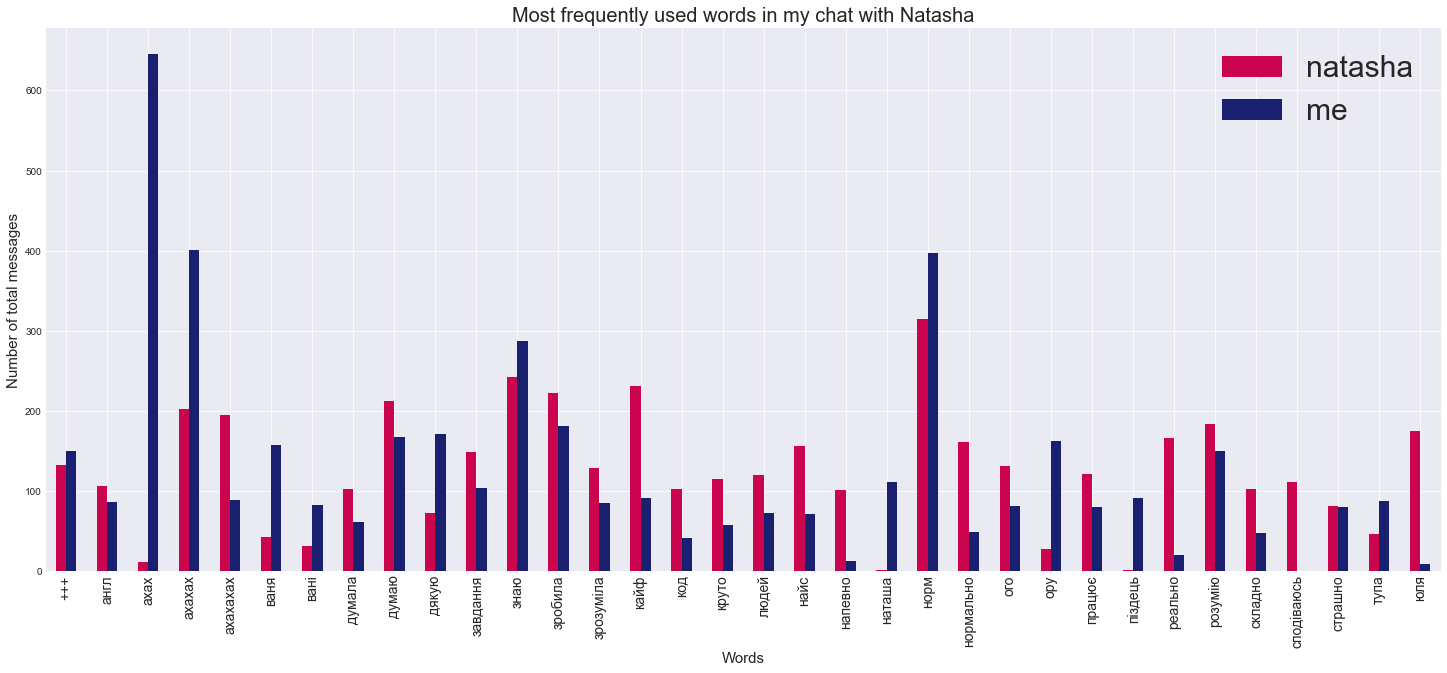

In [236]:
our_words_df.plot(x="word", y=['natasha', 'me'], kind="bar", color=['#CA054D', '#18206F'], fontsize=15)
plt.xlabel('Words', fontsize= 15) 
plt.ylabel('Number of total messages', fontsize= 15)
plt.title('Most frequently used words in my chat with Natasha', fontsize= 20) 
plt.xticks(rotation=90, fontsize= 14)
plt.yticks(fontsize = 10)
plt.rcParams["figure.figsize"] = (25,10)

## 3. Зміна найвживаніших слів кожні півроку з початку 2020

In [206]:
import datetime as dt
from dateutil.relativedelta import relativedelta

In [207]:
df['date.date'] = df['date']
df['date.date'] = pd.to_datetime(df['date.date']).dt.date

In [274]:
# повертає список списків найвживаніших слів з січня 2020 по 3 місяці
most_occur_halfyear = []
max_date = max(df['date.date'])
start = dt.date(year=2020, month=1, day=1)
end = start + relativedelta(months=+1)

while start < max_date:
    my_messages = df[(df.from_id == my_id) & (df.type == 'text') & (df['date.date'] >= start) & (df['date.date']<end)]['message']
    most_occur_halfyear.append(most_occur(split_msg_to_words(my_messages),10))
    start=end
    end=end+relativedelta(months=+1)

In [275]:
# додаємо унікальні слова у список 
unique = np.unique(most_occur_halfyear)
unique_words = [word for word in unique if (not word.isnumeric()) & (not word.isdigit())]
words_occurence_df = pd.DataFrame({'word':unique_words})

In [210]:
columns = ['2020 Jan', '2020 February', '2020 March', '2020 April', '2020 May',
           '2020 June', '2020 July', '2020 August', '2020 September',
           '2020 October', '2020 November', '2020 December',
           '2021 Jan', '2021 February', '2021 March', '2021 April', '2021 May',
           '2021 June', '2021 July', '2021 August', '2021 September',
           '2021 October', '2021 November', '2021 December',
           '2022 January', '2022 February', '2022 March']

start = dt.date(year=2020, month=1, day=1)
end = start + relativedelta(months=+1)

for i in range(0,len(columns)):
    my_messages = df[(df.from_id == my_id) & (df.type == 'text') & (df['date.date']>= start) & (df['date.date']<end)]['message']
    all_words=split_msg_to_words(my_messages)
    values = []
    for word in unique_words:
        values.append(all_words.count(word))
    words_occurence_df[columns[i]]=values
    start=end
    end=end+relativedelta(months=+1)
words_occurence_df['Total']=words_occurence_df.sum(axis=1, numeric_only=True)

In [211]:
words_occurence_df = words_occurence_df[words_occurence_df['Total'] >= 45]
words_occurence_df.sort_values(by='Total')
words_occurence_df.set_index('word')

,2020 Jan,2020 February,2020 March,2020 April,2020 May,2020 June,2020 July,2020 August,2020 September,2020 October,...,2021 July,2021 August,2021 September,2021 October,2021 November,2021 December,2022 January,2022 February,2022 March,Total
word,,,,,,,,,,,,,,,,,,,,,
+++,0,0,0,0,0,0,1,1,4,2,...,8,8,21,31,17,11,16,21,13,324
-_-,0,0,0,0,0,0,0,0,0,0,...,0,4,1,5,5,5,6,2,3,112
англ,0,0,1,0,0,2,3,0,4,8,...,0,0,28,8,10,3,14,3,4,171
ахах,0,4,5,2,3,1,1,8,46,189,...,43,88,146,79,143,154,91,65,64,1917
ахахах,0,1,1,0,0,0,2,4,20,135,...,18,25,26,40,76,90,61,87,70,1079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
укр,0,0,1,0,0,1,3,0,2,22,...,0,0,0,2,4,0,2,1,20,163
хех,0,0,2,0,2,1,0,1,6,107,...,8,7,19,8,10,15,8,4,0,434
хороший,2,0,0,0,0,0,0,2,0,12,...,3,1,0,0,2,2,1,1,6,62


In [212]:
season_columns = ['0-6 months 2020', '7-12 months 2020',
           '0-6 months 2021', '7-12 months 2021',
           '0-6 months 2022', 'Total']
seasonal_occurence = pd.DataFrame({'word':unique_words})

In [213]:
start = dt.date(year=2020, month=1, day=1)
end = start + relativedelta(months=+6)

for i in range(0,len(season_columns)):
    my_messages = df[(df.from_id == my_id) & (df.type == 'text') & (df['date.date']>= start) & (df['date.date']<end)]['message']
    all_words=split_msg_to_words(my_messages)
    values = []
    for word in unique_words:
        values.append(all_words.count(word))
    seasonal_occurence[season_columns[i]]=values
    start=end
    end=end+relativedelta(months=+6)
seasonal_occurence['Total']=seasonal_occurence.sum(axis=1, numeric_only=True)

In [214]:
seasonal_occurence

,word,0-6 months 2020,7-12 months 2020,0-6 months 2021,7-12 months 2021,0-6 months 2022,Total
0,+++,0,14,164,96,50,324
1,-_-,0,44,37,20,13,114
2,англ,3,52,46,49,29,179
3,ахах,15,728,301,653,244,1941
4,ахахах,2,480,104,275,261,1122
...,...,...,...,...,...,...,...
91,черт,7,23,4,1,0,35
92,шведы,2,0,0,0,0,2
93,школу,9,10,0,1,2,22
94,😂😂😂😂,9,102,9,0,0,120


In [215]:
seasonal_occurence = seasonal_occurence[seasonal_occurence['Total'] >= 45]

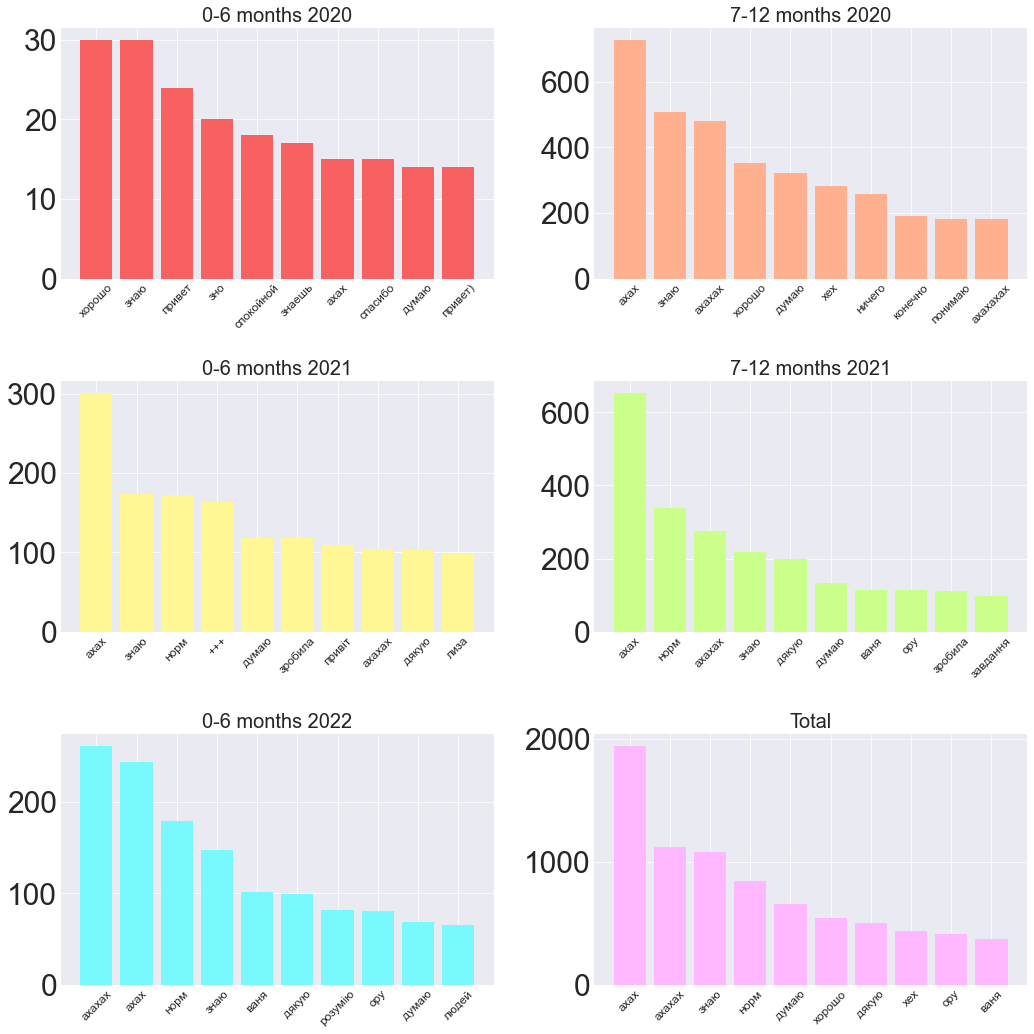

In [259]:
colors = ['#F76161', '#FFB18F', '#FFF694', '#CAFF8A', '#79F9FD', '#FFB7FF']
fig,ax=plt.subplots(3, 2,figsize=(15,15))
num = 0
for column in season_columns:
    top_season_15 = seasonal_occurence.sort_values(by=column, ascending = False).head(10)
    ax[(int(num/2))%3, num%2].bar(top_season_15['word'], top_season_15[season_columns[num]], color=colors[num])
    ax[(int(num/2))%3, num%2].set_title(season_columns[num], fontsize = 20)
    ax[(int(num/2))%3, num%2].set_xticklabels(top_season_15['word'], fontsize=12, rotation=45)
    # ax[(int(num/2))%4, num%2].set_yticklabels(fontsize=12)
    num+=1

plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)

### 4. Топ 15 найвживаніших мною слів

Text(0, 0.5, 'amount')

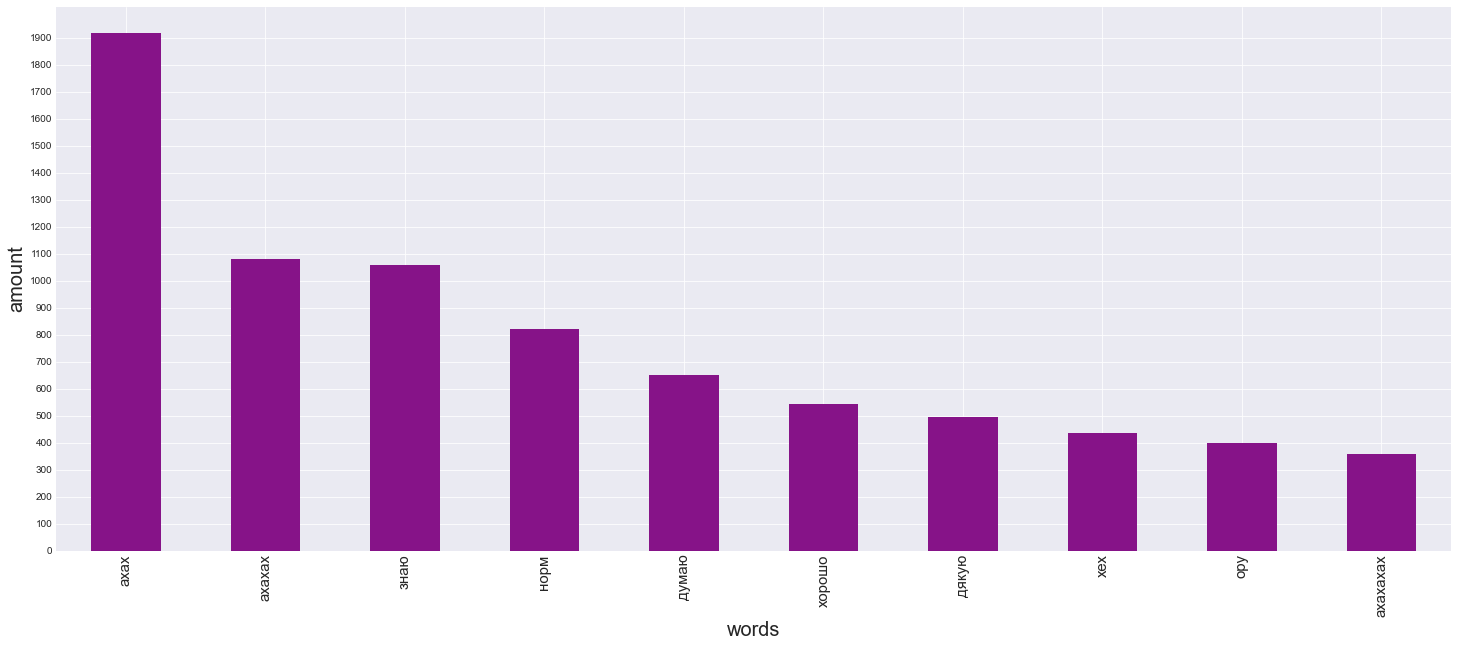

In [261]:
top15 = words_occurence_df.sort_values(by='Total', ascending = False).head(10).set_index('word')
top15['Total'].plot(kind='bar', color = ['#861388'])

plt.yticks(range(0, 2000, 100), fontsize = 10)
plt.xticks(fontsize=15)

plt.xlabel('words', fontsize = 20)
plt.ylabel('amount', fontsize = 20)

### 5. Як змінювалося вживання слів, що позначають сміх?

In [284]:
words_occurence_df = pd.DataFrame({'word':unique_words})
columns = ['2020 Jan', '2020 February', '2020 March', '2020 April', '2020 May',
           '2020 June', '2020 July', '2020 August', '2020 September',
           '2020 October', '2020 November', '2020 December',
           '2021 Jan', '2021 February', '2021 March', '2021 April', '2021 May',
           '2021 June', '2021 July', '2021 August', '2021 September',
           '2021 October', '2021 November', '2021 December',
           '2022 January', '2022 February', '2022 March']

start = dt.date(year=2020, month=1, day=1)
end = start + relativedelta(months=+1)

for i in range(0,len(columns)):
    my_messages = df[(df.from_id == my_id) & (df.type == 'text') & (df['date.date']>= start) & (df['date.date']<end)]['message']
    all_words=split_msg_to_words(my_messages)
    values = []
    for word in unique_words:
        values.append(all_words.count(word)/len(all_words))
    words_occurence_df[columns[i]]=values
    start=end
    end=end+relativedelta(months=+1)
    
words_occurence_df['Average']=words_occurence_df.mean(axis=1, numeric_only=True)
words_occurence_df.sort_values(by='Average')
words_occurence_df.set_index('word')

,2020 Jan,2020 February,2020 March,2020 April,2020 May,2020 June,2020 July,2020 August,2020 September,2020 October,...,2021 July,2021 August,2021 September,2021 October,2021 November,2021 December,2022 January,2022 February,2022 March,Average
word,,,,,,,,,,,,,,,,,,,,,
+++,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001073,0.000943,0.000983,0.000102,...,0.002294,0.002254,0.002819,0.004434,0.001941,0.001373,0.002159,0.002426,0.001332,0.002075
-_-,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.001127,0.000134,0.000715,0.000571,0.000624,0.000810,0.000231,0.000307,0.000500
англ,0.00000,0.000000,0.000769,0.000000,0.000000,0.002801,0.003219,0.000000,0.000983,0.000409,...,0.000000,0.000000,0.003758,0.001144,0.001142,0.000375,0.001889,0.000347,0.000410,0.001010
ахах,0.00000,0.013378,0.003843,0.002451,0.005660,0.001401,0.001073,0.007547,0.011299,0.009651,...,0.012332,0.024789,0.019597,0.011299,0.016330,0.019228,0.012281,0.007510,0.006558,0.009973
ахахах,0.00000,0.003344,0.000769,0.000000,0.000000,0.000000,0.002146,0.003774,0.004913,0.006894,...,0.005162,0.007042,0.003490,0.005721,0.008679,0.011237,0.008232,0.010052,0.007173,0.004586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
черт,0.00000,0.000000,0.002306,0.003676,0.000000,0.001401,0.001073,0.000000,0.000246,0.000306,...,0.000000,0.000000,0.000134,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000399
шведы,0.00905,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000335
школу,0.00000,0.013378,0.002306,0.001225,0.000000,0.001401,0.000000,0.000000,0.000246,0.000255,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000125,0.000000,0.000116,0.000000,0.000713


In [299]:
laughters = ['ахах','ахахах','ахахахах', 'ору','хех', '😂😂😂😂']
laughter_df = words_occurence_df[words_occurence_df['word'].isin(laughters)].sort_values(by='Average', ascending=False).set_index('word')
laughter_df = laughter_df.transpose().drop('Average')
laughter_df['x'] = range(0, 27)

### 5.1 Як змінювалося вживання найвживанішого сміху "ахах"?

2022-05-07 15:16:29,254 | INFO | category.py:227 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2022-05-07 15:16:29,264 | INFO | category.py:227 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


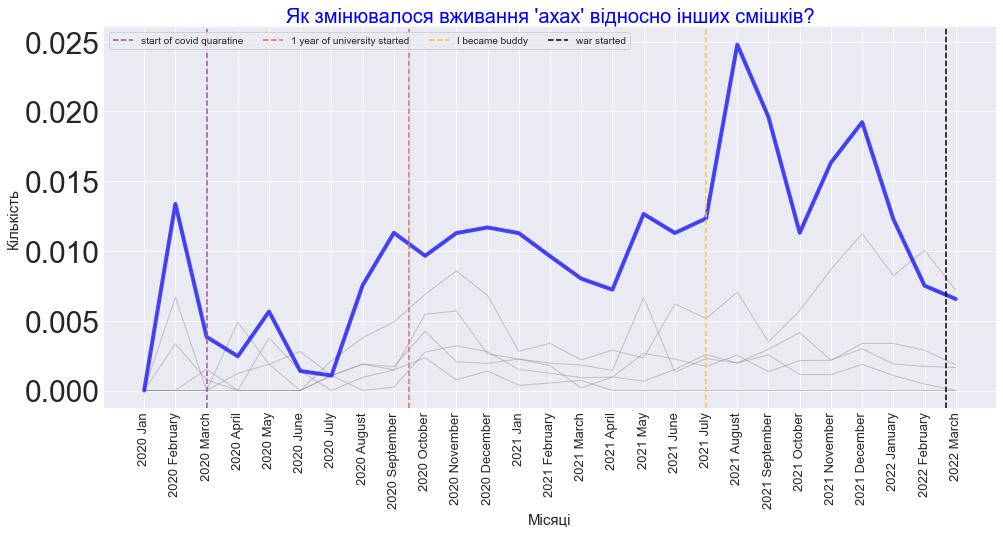

In [307]:
# Change the style of plot
plt.style.use('seaborn-darkgrid')
plt.figure(figsize = (16,7))
# plot multiple lines
for column in laughter_df.drop('x', axis=1):
    plt.plot(laughter_df['x'], laughter_df[column], marker='', color='grey', linewidth=1, alpha=0.4)

# Now re do the interesting curve, but biger with distinct color
plt.plot(columns, laughter_df['ахах'], marker='', color='blue', linewidth=4, alpha=0.7)


# Add titles
plt.title("Як змінювалося вживання 'ахах' відносно інших смішків?", loc='center', fontsize=20, fontweight=0, color='blue')
plt.xticks(rotation = 90, fontsize = 13)
plt.xlabel("Місяці",  fontsize=15)
plt.ylabel("Кількість",  fontsize=15)

plt.axvline(x = 2, linestyle ='--', color = '#A4508B', label = 'start of covid quaratine')
plt.axvline(x = 8.5, linestyle ='--', color = '#ED6A5A', label = '1 year of university started')
plt.axvline(x = 18, linestyle ='--', color = '#FFC145', label = 'I became buddy')
plt.axvline(x = 25.7, linestyle ='--', color = '#000000', label = 'war started')

plt.legend(loc = "upper left", frameon = True, fontsize = 10, ncol=4 )
# Show the graph
plt.show()

### 5.2 Як змінювалося вживання кожного сміху у порівнянні з усіма?

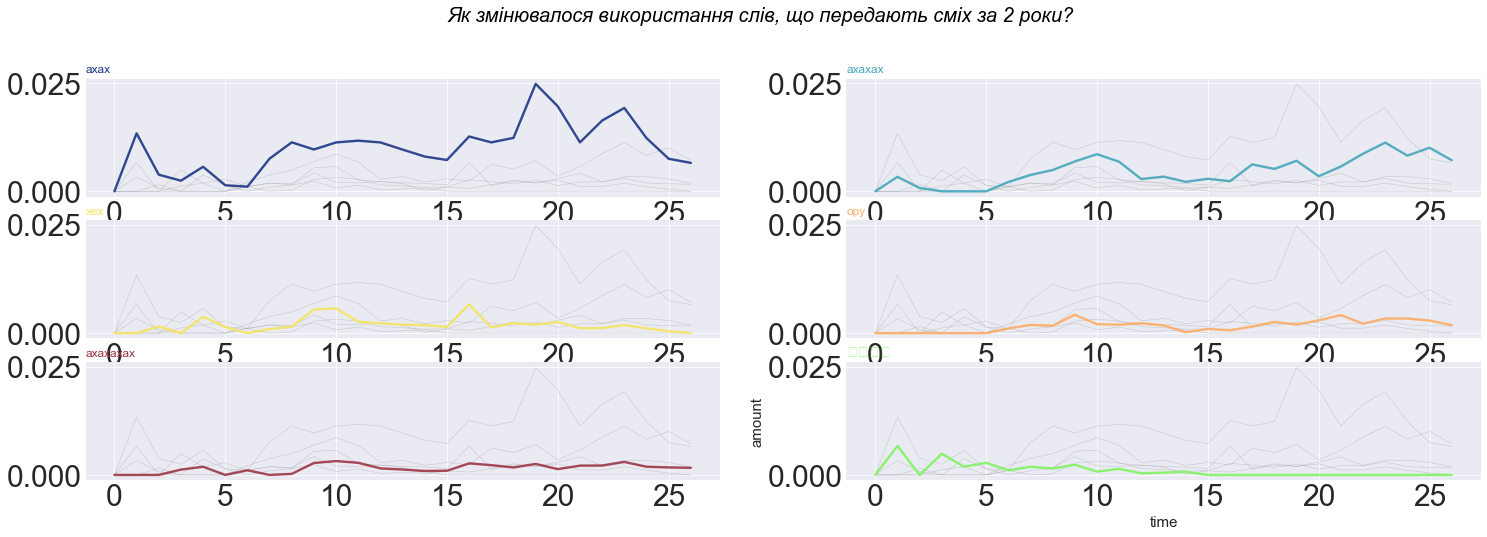

In [295]:
# Initialize the figure style
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = ['#1E3888', '#47A8BD', '#F5E663', '#FFAD69', '#9C3848', '#82F562']
# multiple line plot
num=0
for column in laughter_df.drop('x', axis=1):
    num+=1
 
    # Find the right spot on the plot
    plt.subplot(4,2, num)
 
    # plot every group, but discrete
    for v in laughter_df.drop('x', axis=1):
        plt.plot(laughter_df['x'], laughter_df[v], marker='', color='grey', linewidth=0.6, alpha=0.3, label=column)
 
    # Plot the lineplot
    plt.plot(laughter_df['x'], laughter_df[column], marker='', color=palette[num-1], linewidth=2.4, alpha=0.9, label=column)
 
    # Not ticks everywhere
    if num in range(7) :
        plt.tick_params(labelbottom='on')
    if num not in [1,4,7] :
        plt.tick_params(labelleft='on')
    
    plt.title(column, loc='left', fontsize=12, fontweight=0, color=palette[num-1])
    
# Add title
plt.title(column, loc='left', fontsize=15, fontweight=0, color=palette[num-1] )
plt.xlabel('time', fontsize = 15)
plt.ylabel('amount', fontsize = 15)

# general title
plt.suptitle("Як змінювалося використання слів, що передають сміх за 2 роки?", fontsize=20, fontweight=0, color='black', style='italic')
# Show the graph
plt.show()

## 6.1 Кількість людей у яких недоступний номер телефону( з усіх людей, з якими я пов'язана через чати)?

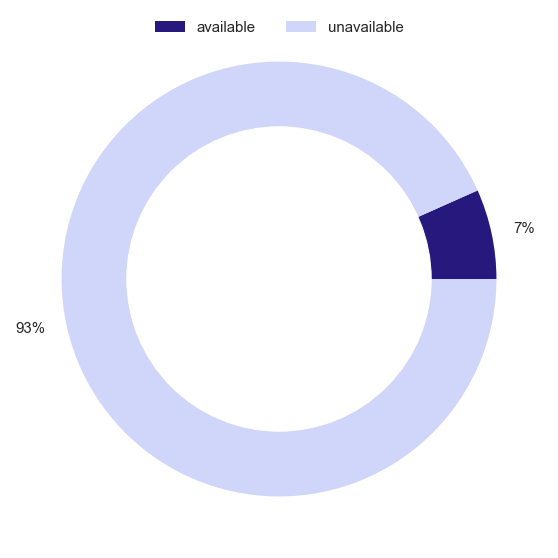

In [222]:
copy_meta = df_meta.copy().drop_duplicates(subset = 'users', keep = 'first').reset_index()
copy_meta
available = 0
unavailable = 0
for user in copy_meta['users']:
    if user[-5:-1] == 'None':
        unavailable+=1
    else:
        available+=1
total = available + unavailable
groups = [available, unavailable]
names = ['available', 'unavailable']
percents = [f'{round(available/total * 100)}%', f'{round(unavailable/total * 100)}%']
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Give color names
plt.pie(groups, labels=percents, colors=['#27187E','#D0D5FA'],  textprops={'fontsize': 15})
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend(names, loc="upper center", fontsize=15, ncol=2)
# Show the graph
plt.show()

## 6.2 Кількість людей, у яких прихований номер з тих, кому я писала в пп( приватні повідомлення )?

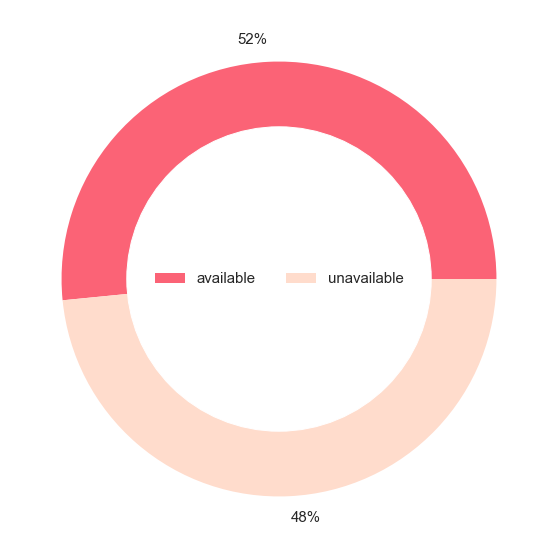

In [223]:
private_chats = df_meta[df_meta.type == 'Private dialog']

available = 0
unavailable = 0
dialogs = []
for dialog in private_chats.dialog_id:
    if df[df.dialog_id == dialog]['message'].count() > 50:
        dialogs.append(dialog)
            
for dialog in dialogs:
    for user in df_meta[df_meta['dialog_id']==dialog]['users']:
        if user[-5:-1] == 'None':
            unavailable+=1
        else:
            available+=1
total = available + unavailable
groups = [available, unavailable]
names = ['available', 'unavailable']
percents = [f'{round(available/total * 100)}%', f'{round(unavailable/total * 100)}%']
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Give color names
plt.pie(groups, labels=percents, colors=['#FB6376', '#FFDCCC'],  textprops={'fontsize': 15})
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend(names, loc="center", fontsize=15, ncol=2)
# Show the graph
plt.show()           


## 7. Найбільш активний час використання додатку протягом доби?
### 7.1 за годинами 

In [224]:
df['date'] = pd.to_datetime(df['date'])
my_msg = df[(df.from_id == my_id) & (df.type == 'text')]
my_msg['hour'] = my_msg['date'].dt.hour
my_msg['hour'] = [(hour + 2)%24 for hour in my_msg['hour']]

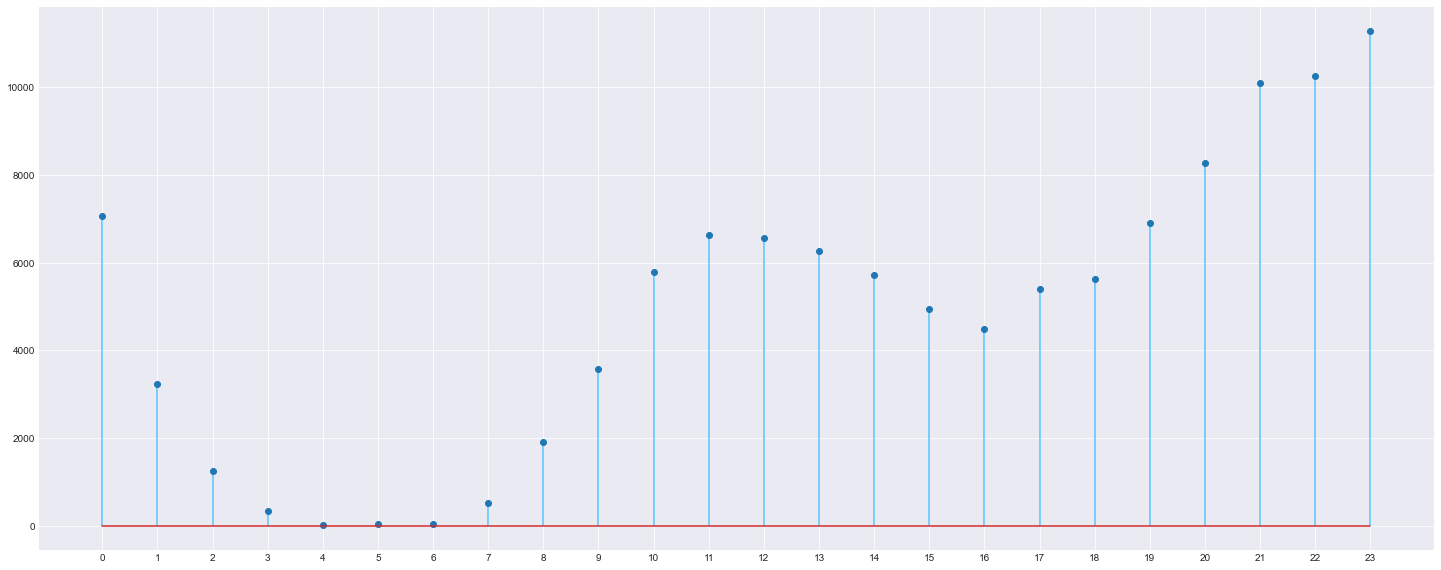

In [225]:
time_amount = my_msg.groupby('hour')['message'].count()
plt.stem(time_amount, linefmt='#55C1FF')
plt.xticks( range(0, 24), fontsize = 10)
plt.show()

Text(0, 0.5, 'Amount')

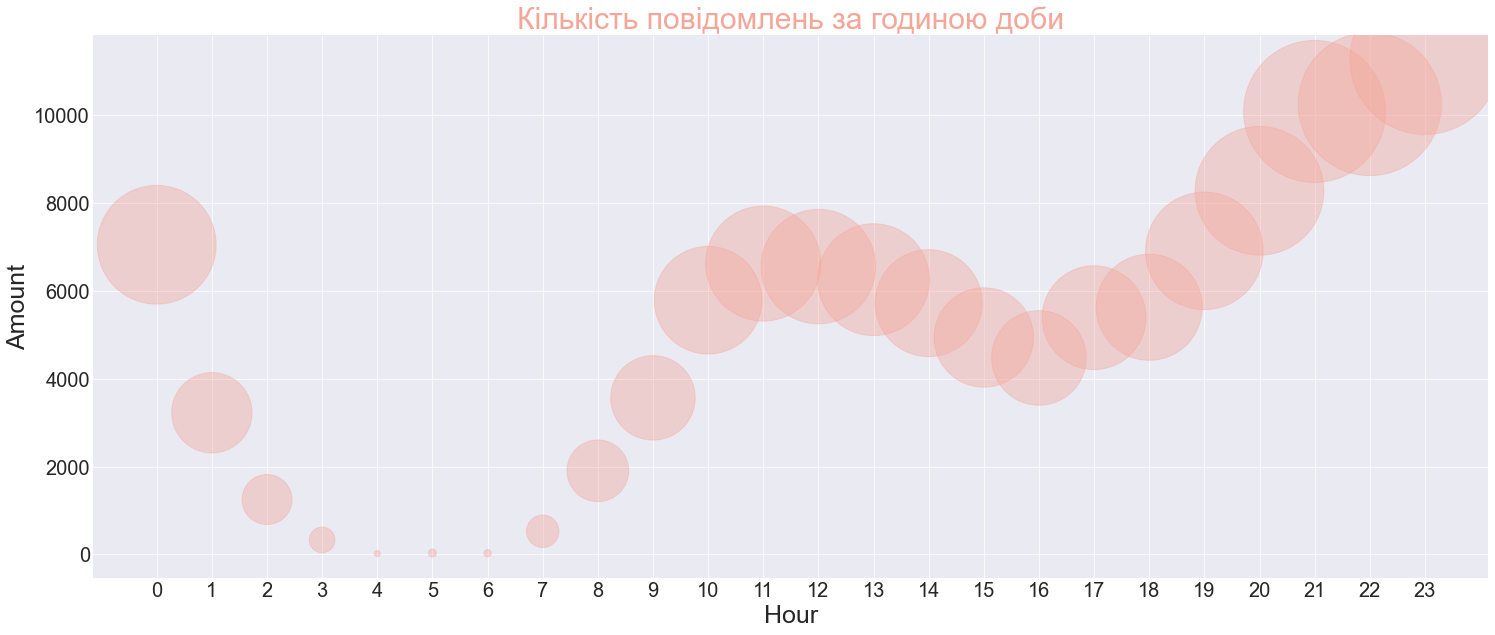

In [226]:
plt.scatter(time_amount.index, time_amount, s=time_amount*2, c="#F4A698", alpha=0.4)
plt.xticks(range(0, 24), fontsize = 20)
plt.yticks(fontsize = 20)
plt.rcParams["figure.figsize"] = (30,15)
plt.title("Кількість повідомлень за годиною доби", loc='center', fontsize=30, fontweight=0, color='#F4A698')
plt.xlabel('Hour', fontsize = 25)
plt.ylabel('Amount', fontsize = 25)

### 7.2 за проміжками у 6 годин

In [227]:
time_intervals_amount = [time_amount[i*6: i*6+6].sum() for i in range(0,4)]

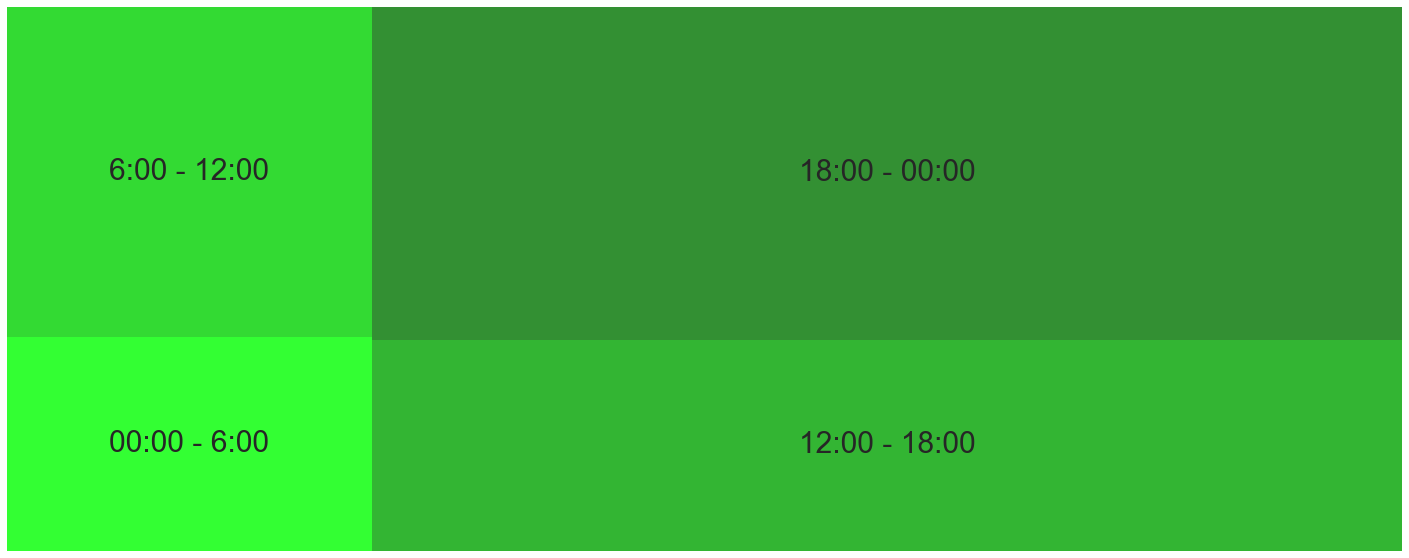

In [308]:
import squarify

squarify.plot(sizes=time_intervals_amount, alpha=.8, color=[ '#00FF00', '#00D100', '#00A300', '#007500'],  label=["00:00 - 6:00", "6:00 - 12:00", "12:00 - 18:00", "18:00 - 00:00"])
plt.rc('font', size=30)   
plt.axis('off')
plt.rcParams["figure.figsize"] = (15,10)
plt.show()

## 8. Помісячні зміни кількості повідомлень протягом 2-ох років і кореляція цих змін з подіями в моєму житі

In [229]:
max_date = max(my_msg['date.date'])
start = dt.date(year=2020, month=1, day=1)
end = start + relativedelta(months=+1)

monthly_amount = []
while start < max_date:
    my_messages = my_msg[(my_msg.from_id == my_id) & (my_msg.type == 'text') & (my_msg['date.date'] >= start) & (my_msg['date.date']<end)]['message'].count()
    monthly_amount.append(my_messages)
    start=end
    end=end+relativedelta(months=+1)

In [230]:
bars = ['2020 Jan', '2020 February', '2020 March', '2020 April', '2020 May',
           '2020 June', '2020 July', '2020 August', '2020 September',
           '2020 October', '2020 November', '2020 December',
           '2021 Jan', '2021 February', '2021 March', '2021 April', '2021 May',
           '2021 June', '2021 July', '2021 August', '2021 September',
           '2021 October', '2021 November', '2021 December',
           '2022 January', '2022 February', '2022 March', '2022 April']

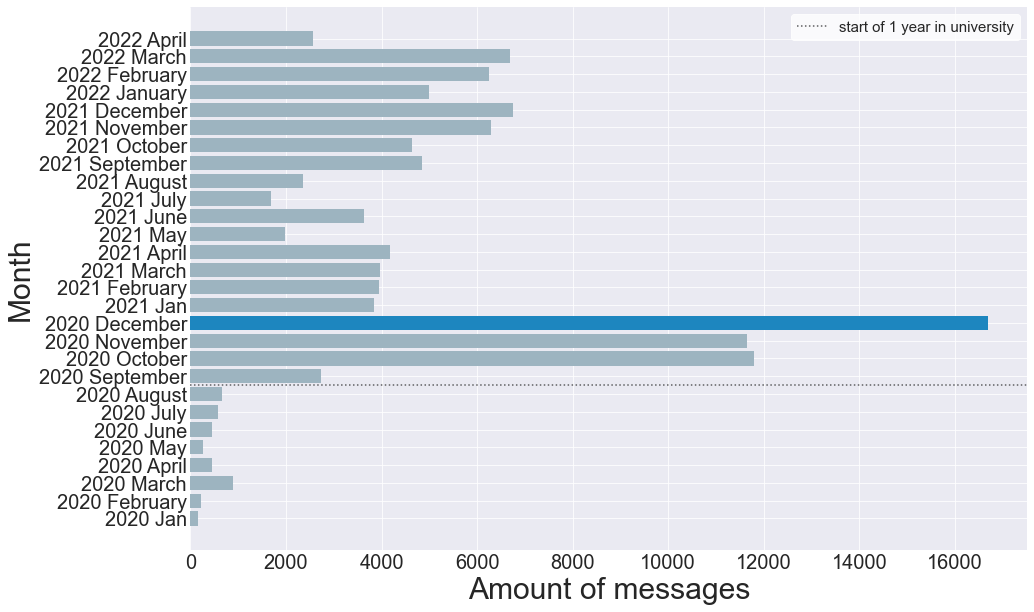

In [312]:
palette = ['#9DB4C0']
palette = ["#9DB4C0" if i != 11 else "#1D86BF" for i in range(0,28)]
y_pos = np.arange(len(bars))
 
# Create horizontal bars
fig,ax = plt.subplots(figsize = (15,10))

plt.barh(y_pos, monthly_amount, color=palette)
# Create names on the x-axis
plt.yticks(y_pos, bars, fontsize=20)
plt.xticks(range(0, 18000, 2000), fontsize = 20)
plt.axhline(y = 7.5, color = '#5D5E60', linestyle = ':', label = "start of 1 year in university")
plt.xlabel('Amount of messages')
plt.ylabel('Month')
plt.rcParams["figure.figsize"] = (10,10)
# Show graphic
legend = plt.legend(loc="upper right", ncol = 1, frameon = 1, fontsize=15)
frame = legend.get_frame()
frame.set_color('white')
plt.show()

- Як можна побачити на графіку, в останнє півріччя мого навчання у школі, коли саме почався ковід і карантини, я спілкувалася дуже мало( хоча графік та аналіз повідомлень настільки давно у часі потребував би іншого скачування повідомлень з більшою їх кількістю).
- На графіку помітно, що після мого вступу в Могилянку у вересні 2020 відбувся різкий скачок к-кості повідомлень від мене 
- Також видно невеликий скачок, після початку війни, адже навіть люди, з якими ми мало спілкувалися, написали і запитали, чи все у мене впорядку
- Також можна помітити, що періоди зимових та літніх канікул мають менше повідомлень, аніж ті, які були до них

## 9. Найбільш вживані мною і моїми близькими друзями емодзі та стікери

In [328]:
import emoji
import regex

def split_count(text):

    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI['en'] for char in word):
            emoji_list.append(word)
    
    return emoji_list

In [329]:
natasha_emoji_list = split_count(" ".join(split_msg_to_words(df[(df.from_id==my_bestfriend_id) & (df.type=='text')]['message'])))
my_emoji_list = split_count(" ".join(split_msg_to_words(df[(df.from_id==my_id) & (df.type=='text')]['message'])))
prymaty_emoji_list = split_count(" ".join(split_msg_to_words(prymaty_messages)))

In [330]:
from collections import Counter
natasha_emoji = Counter(natasha_emoji_list).most_common(10)
my_emoji = Counter(my_emoji_list).most_common(10)
prymaty_emoji = Counter(prymaty_emoji_list).most_common(10)
emoji_df = pd.DataFrame(my_emoji)
emoji_df

,0,1
0,❤,6883
1,😂,1396
2,😅,748
3,😭,267
4,🤷🏻‍♀️,218
5,🗿,188
6,❤️,188
7,🤡,176
8,😑,174
9,👍,112


### 9.1 Найбільш вживаніші мною емодзі

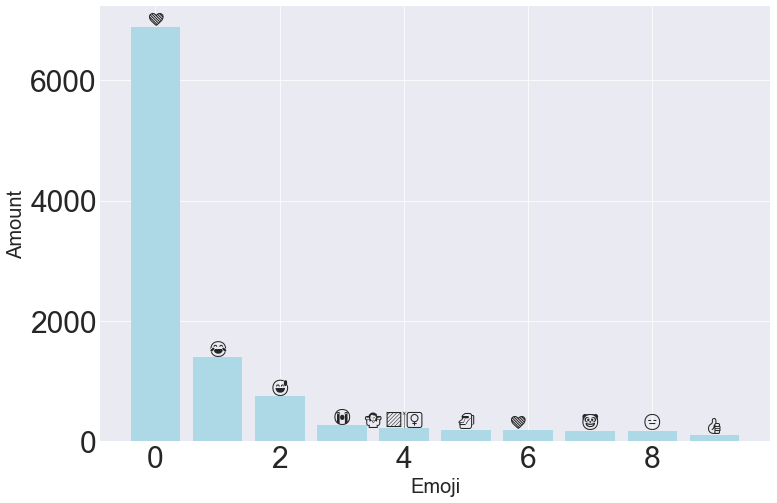

In [331]:
labels =emoji_df[0]
freqs = emoji_df[1]

plt.figure(figsize=(12,8))
p1 = plt.bar(np.arange(len(labels)), freqs, 0.8, color="lightblue")

for rect1, label in zip(p1, labels):
    height = rect1.get_height()
    plt.annotate(
        label,
        (rect1.get_x() + rect1.get_width()/2, height+5),
        ha="center",
        va="bottom",
        fontsize=15,
        fontname='Segoe UI Emoji'
    )

plt.ylabel('Amount', fontsize = 20)
plt.xlabel('Emoji', fontsize = 20)
plt.show()

### 9.2 Найбільш вживані моєю подругою Наташею емодзі 

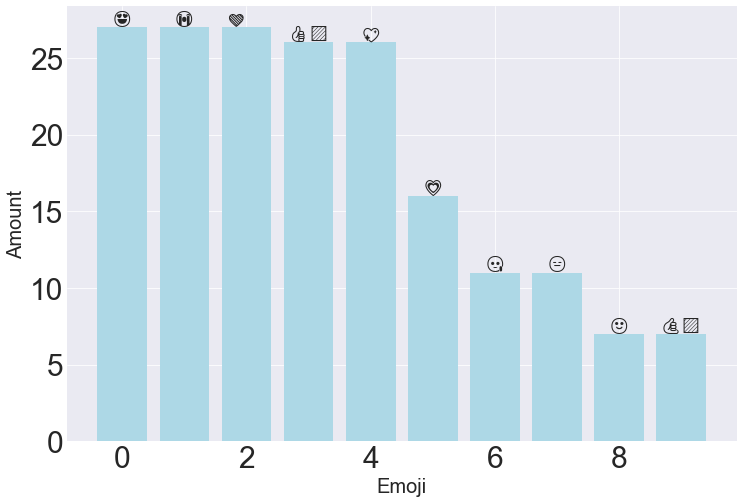

In [332]:
emoji_df = pd.DataFrame(natasha_emoji)
labels = emoji_df[0]
freqs = emoji_df[1]

plt.figure(figsize=(12,8))
p1 = plt.bar(np.arange(len(labels)), freqs, 0.8, color="lightblue")

for rect1, label in zip(p1, labels):
    height = rect1.get_height()
    plt.annotate(
        label,
        (rect1.get_x() + rect1.get_width()/2, height),
        ha="center",
        va="bottom",
        fontsize=15,
        fontname='Segoe UI Emoji'
    )

plt.ylabel('Amount', fontsize = 20)
plt.xlabel('Emoji', fontsize = 20)
plt.show()

### 9.3 Найвживаніші емодзі у чаті Прикладної математики( від усіх відправників )

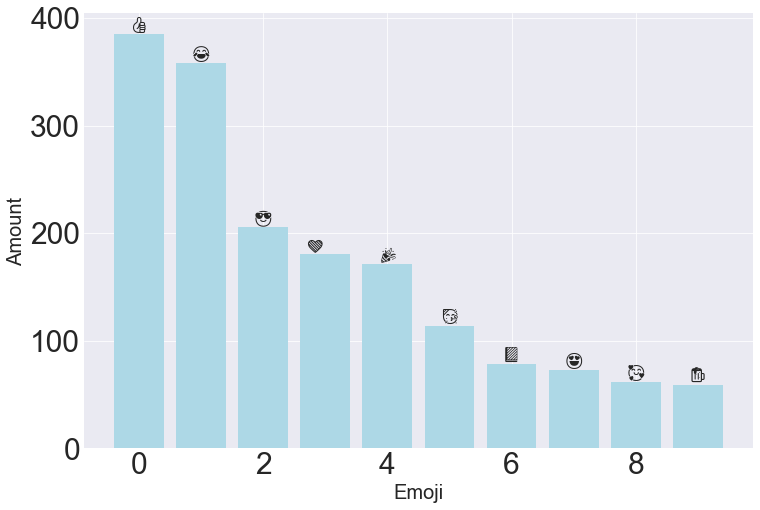

In [333]:
emoji_df = pd.DataFrame(prymaty_emoji)
labels = emoji_df[0]
freqs = emoji_df[1]

plt.figure(figsize=(12,8))
p1 = plt.bar(np.arange(len(labels)), freqs, 0.8, color="lightblue")

for rect1, label in zip(p1, labels):
    height = rect1.get_height()
    plt.annotate(
        label,
        (rect1.get_x() + rect1.get_width()/2, height),
        ha="center",
        va="bottom",
        fontsize=15,
        fontname='Segoe UI Emoji'
    )

plt.ylabel('Amount', fontsize = 20)
plt.xlabel('Emoji', fontsize = 20)
plt.show()

Як можна побачити, тут досить поширеним є емодзі з вітаннями( адже ми вітаємо один одного з днями народження )

## 10. Люди, які частіше пишуть першими мені, а не я їм

### 10.1 Як часто я пишу першою Наташі?

In [334]:
# messages from my chat with natasha
our_chat = df[(df.dialog_id==544639169)]
our_chat['hour'] = our_chat['date'].dt.hour

me = 0
natasha = 0

for date in our_chat['date.date'].unique():
    today = our_chat[(our_chat['date.date']==date) &(our_chat['hour']>3) ]
    if today['message'].count()>0:
        today_first = today[(today['date']==min(today['date']))]
        from_id = today_first.iloc[0]['from_id']
        if from_id=='PeerUser(user_id=342667961)':
            me+=1
        elif str(from_id)=='nan':
            natasha+=1

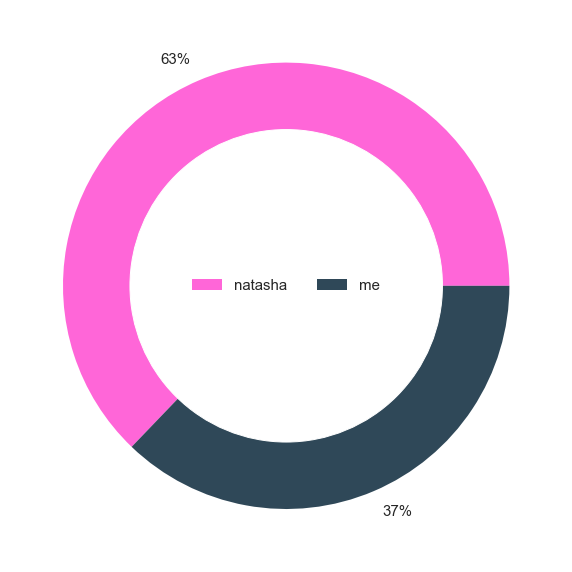

In [335]:
total = natasha + me
groups = [natasha, me]
names = ['natasha', 'me']
percents = [f'{round(natasha/total * 100)}%', f'{round(me/total * 100)}%']
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Give color names
plt.pie(groups, labels=percents, colors=['#FF66D8', '#2F4858'],  textprops={'fontsize': 15})
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend(names, loc="center", fontsize=15, ncol=2)
# Show the graph
plt.show()    

### 10.2 Скільки людей, з якими ми маємо приватні чати і листувалися більше 10 різних днів, писало найчастіше першими мені, скільком я писала першою найчастіше та зі скількома людьми ці цифри відносно однакові?

In [336]:
df_merged['date'] = pd.to_datetime(df_merged['date'])
df_merged['date.date'] = df_merged['date'].dt.date
df_merged['hour'] = df_merged['date'].dt.hour

In [337]:
dialog_ids = df_meta[df_meta['type']=='Private dialog']['dialog_id'].unique()

In [338]:
name = []
first = []
me_first = []

for dialog in dialog_ids:
    chat = df_merged[df_merged['dialog_id']==dialog]
    me = 0
    not_me = 0
    for date in chat['date.date'].unique():
        today = chat[(chat['date.date']==date) &(chat['hour']>3) ]
        if today['message'].count()>0:
            today_first = today[(today['date']==min(today['date']))]
            from_id = today_first.iloc[0]['from_id']
            if dialog==1419351245:
                if from_id == 'PeerUser(user_id=1419351245)':
                    not_me+=1
                elif str(from_id)=='nan':
                    me+=1
            else:
                if from_id=='PeerUser(user_id=342667961)':
                    me+=1
                elif str(from_id)=='nan':
                    not_me+=1
    first.append(not_me)
    me_first.append(me)
    name.append("".join(chat['name'].unique()))

In [339]:
writes_first_df = pd.DataFrame({'name':name, 'writes_first':first, 'i_write_first':me_first})
writes_first_df['total_days'] = writes_first_df['writes_first'] + writes_first_df['i_write_first']
writes_first_df = writes_first_df.sort_values(by='total_days', ascending=False)

# тепер прибираємо чати з кількістю днів спілкування меншою хоча б 10
writes_first_df = writes_first_df[writes_first_df['total_days']>=10]
writes_first_df = writes_first_df[writes_first_df.name.isin(['KMAScheduler', 'Yulia Verbik']) == False]
# writes_first_df = writes_first_df.drop('Yulia Verbik')
writes_first_df

,name,writes_first,i_write_first,total_days
107,natasha,240,142,382
74,Лиза 🍕,143,69,212
8,Ваня,84,111,195
52,Darynka,57,90,147
92,Аня,52,49,101
78,Андрійко,63,22,85
79,Яся,14,59,73
31,Dmytro Novykov,32,29,61
44,Настя Філенко,31,22,53
114,Макс),20,31,51


In [340]:
from matplotlib_venn import venn2
writes_me_first = writes_first_df[writes_first_df['writes_first']/writes_first_df['total_days'] >= 0.55]
i_write_first = writes_first_df[writes_first_df['i_write_first']/writes_first_df['total_days'] >= 0.55]
equally = writes_first_df[(writes_first_df['writes_first']/writes_first_df['total_days'] < 0.55 ) & (writes_first_df['writes_first']/writes_first_df['total_days'] > 0.45 )]

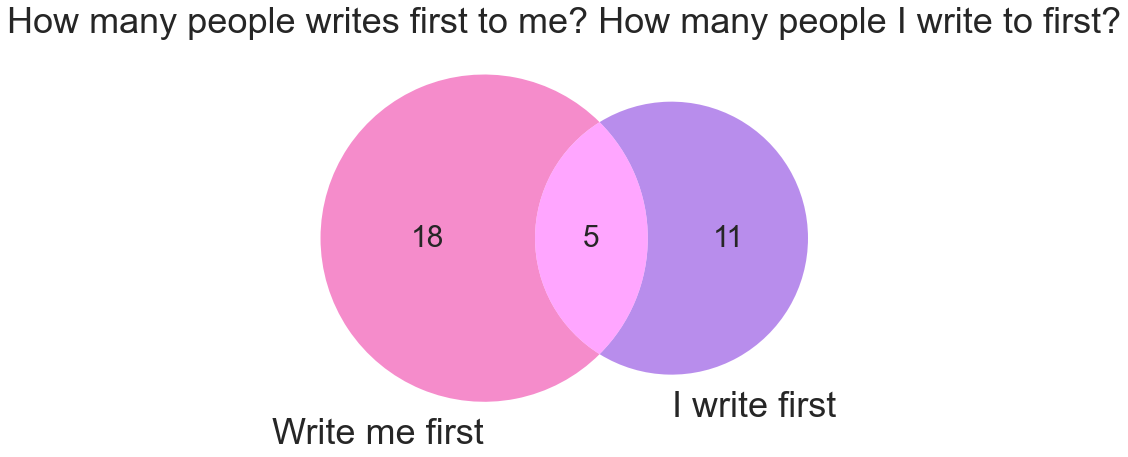

In [341]:
venn2(subsets = (writes_me_first['total_days'].count(), i_write_first['total_days'].count(),equally['total_days'].count()),
      set_labels = ('Write me first', 'I write first'),
      set_colors=("#F15BB5", "#9B5DE5"),alpha=0.7)
plt.title('How many people writes first to me? How many people I write to first?')
plt.show()

### 10.3 Як відрізняється кількість разів, коли я писала першою, та кількість разів, коли мені писали першими, з 15 людьми, з якими я листувалася найбільшу кількість різних днів?

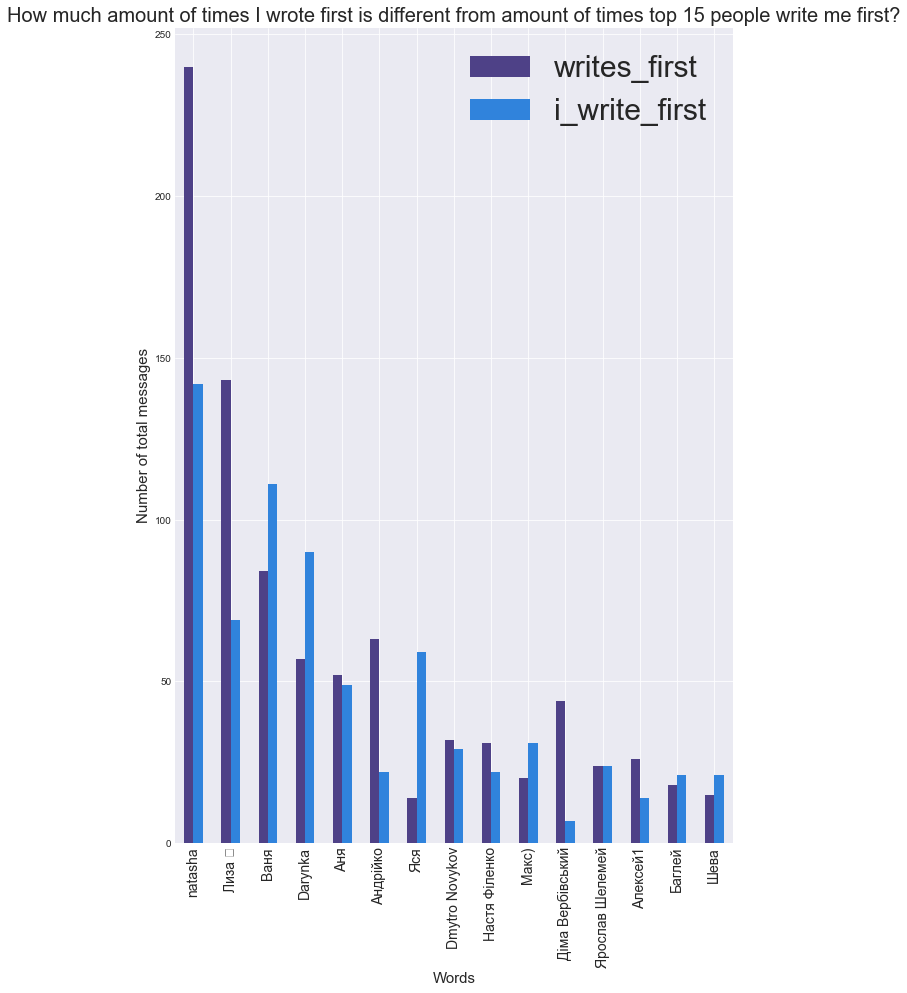

In [342]:
writes_first_df.sort_values(by='total_days', ascending=False).head(15).plot(x='name', y=['writes_first', 'i_write_first'], kind="bar", color=['#4E4187', '#3083DC'], fontsize=15)
plt.xlabel('Words', fontsize= 15) 
plt.ylabel('Number of total messages', fontsize= 15)
plt.title('How much amount of times I wrote first is different from amount of times top 15 people write me first?', fontsize= 20) 
plt.xticks(rotation=90, fontsize= 14)
plt.yticks(fontsize = 10)
plt.rcParams["figure.figsize"] = (10,15)

## 11. Як змінювалися люди з якими я найбільше спілкувалася? по півроку

In [343]:
start = dt.date(year=2020, month=1, day=1)
end = start + relativedelta(months=+6)

top_people = []
while start<max(df_merged['date.date']):
    private_chats = df_merged[(df_merged['type_dialog']=='Private dialog') & (df_merged['date.date']>= start) & (df_merged['date.date']<end)]
    top10 = private_chats.groupby(["name"])["message"].count().sort_values(ascending = False).head(5)
    top_people.append(top10)
    start += relativedelta(months=+6)
    end+= relativedelta(months=+6)

In [344]:
seasons = ['0-6 months 2020', '7-12 months 2020',
           '0-6 months 2021', '7-12 months 2021',
           '0-6 months 2022', 'total', '0']
private_chats = df_merged[(df_merged['type_dialog']=='Private dialog')]
top10 = private_chats.groupby(["name"])["message"].count().sort_values(ascending = False).head(5)
top_people.append(top10)
top_people[1]

name
Андрійко    37342
Лиза 🍕      13947
Darynka      3161
Юра          1338
Макс)        1300
Name: message, dtype: int64

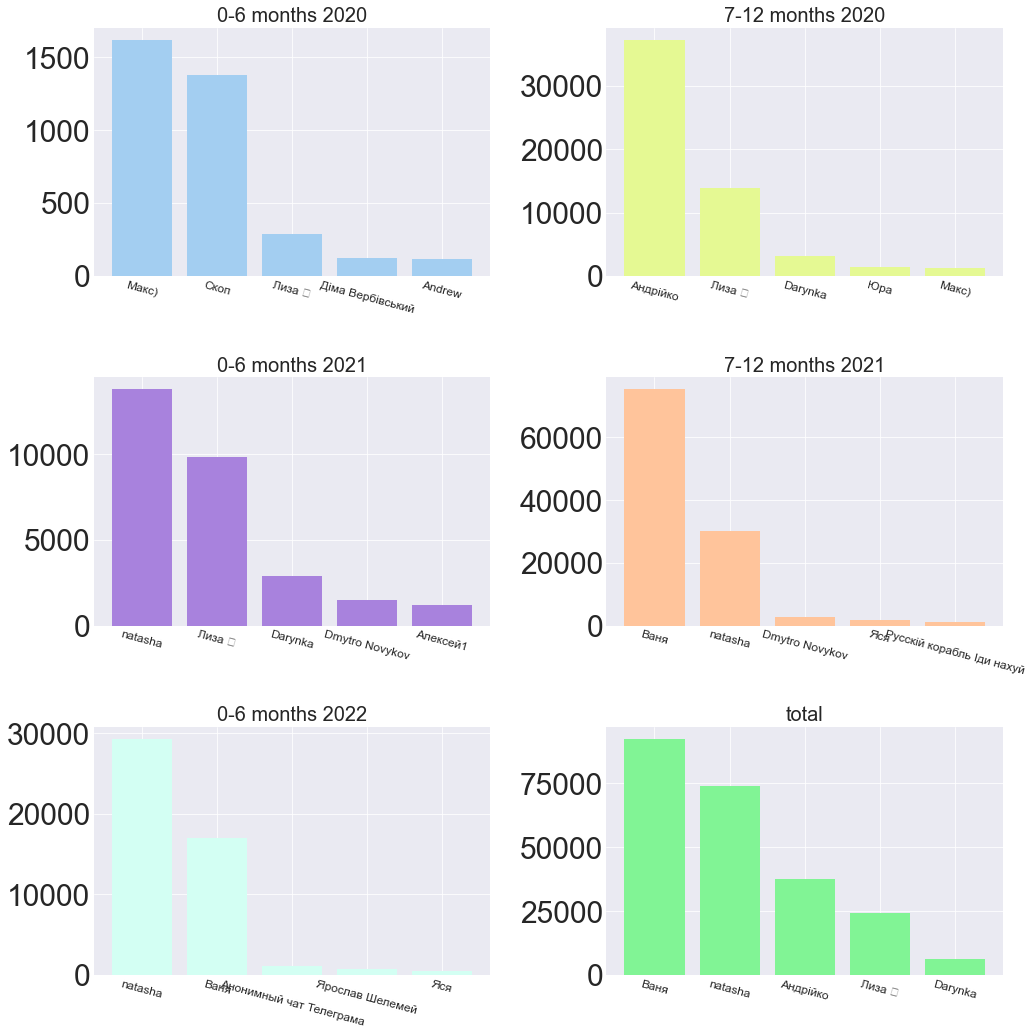

In [345]:
colors = ['#A3CEF1', '#E5F993', '#A882DD', '#FFC49B', '#D3FFF3', '#81F495']
fig,ax=plt.subplots(3, 2,figsize=(15,15))
num = 0
for data in top_people:
    top10 = pd.DataFrame({'name':list(data.keys()), 'amount':data})
    ax[(int(num/2))%3, num%2].bar(top10['name'], top10['amount'], color=colors[num])
    ax[(int(num/2))%3, num%2].set_title(seasons[num], fontsize = 20)
    ax[(int(num/2))%3, num%2].set_xticklabels(top10['name'], fontsize=12, rotation=345)
    # ax[(int(num/2))%4, num%2].set_yticklabels(fontsize=12)
    num+=1
plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)

Власне от моє особисте спілкування і є, коли анонімний чат, в якому я тролила русню один вечір займає 3 місце...

## Запитання пов'язані з використанням різних мов

In [346]:
import spacy_fastlang
import spacy

In [347]:
df_lang = pd.read_csv('D:/Naukma/DS/Hw/df_lang')

### 12. 3 найбільш вживані мови у діалогах та їхнє розподілення
### a. усі повідомлення, усіх відправників

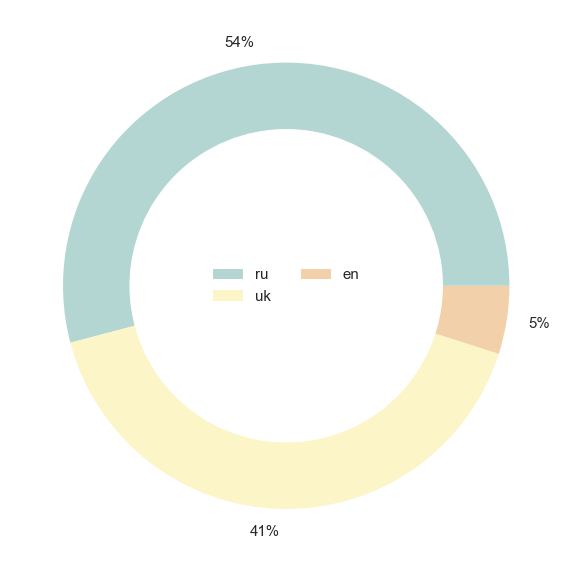

In [348]:
uk = df_lang.groupby(["lang"])["message"].count().sort_values(ascending = False).head(3)
total = uk.sum()
percentage = [f'{round((uk[0]/total)*100)}%', f'{round((uk[1]/total)*100)}%', f'{round((uk[2]/total)*100)}%']
plt.pie(uk, labels=percentage, colors=['#B4D6D3', '#FCF5C7', '#F2D0A9'],  textprops={'fontsize': 15})
p = plt.gcf()
my_circle = plt.Circle( (0,0), 0.7, color='white')
p.gca().add_artist(my_circle)
plt.legend(list(uk.keys()), loc="center", fontsize=15, ncol=2)
# Show the graph
plt.show()    

### b. повідомлення від мене

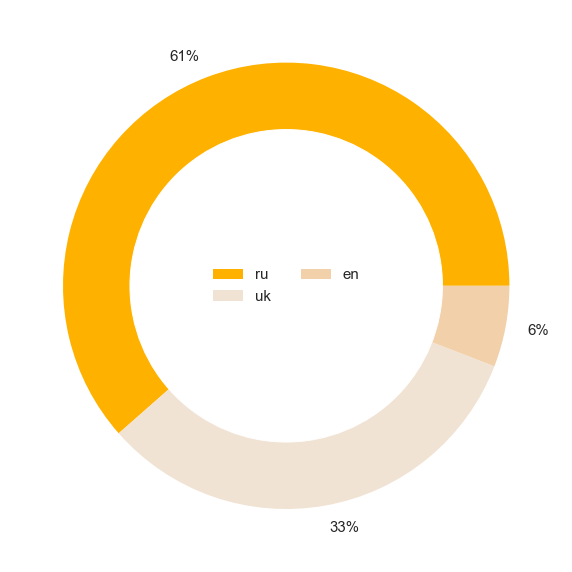

In [349]:
uk = df_lang[df_lang['from_id']==my_id].groupby(["lang"])["message"].count().sort_values(ascending = False).head(3)
total = uk.sum()
percentage = [f'{round((uk[0]/total)*100)}%', f'{round((uk[1]/total)*100)}%', f'{round((uk[2]/total)*100)}%']
plt.pie(uk, labels=percentage, colors=['#FFB100', '#F1E3D3', '#F2D0A9'],  textprops={'fontsize': 15})
p = plt.gcf()
my_circle = plt.Circle( (0,0), 0.7, color='white')
p.gca().add_artist(my_circle)
plt.legend(list(uk.keys()), loc="center", fontsize=15, ncol=2)
# Show the graph
plt.show()    

### 13. Розподілення мов у повідомленнях 5 людей, з якими я найбільше спілкуюся

In [350]:
def get_name(dialog):
    return df_meta[df_meta['dialog_id']==dialog]['name'].values[0]

In [351]:
top_private_chats = df_merged[(df_merged['type_dialog']=='Private dialog')].groupby(["dialog_id"])["message"].count().sort_values(ascending = False).head(5)
top5_people = df_lang.loc[(df_lang['dialog_id'].isin(top_private_chats.keys())) & (df_lang['from_id'] != 'PeerUser(user_id=342667961)')]
top5_people = top5_people[(top5_people['dialog_id']!=1419351245)|(~top5_people['from_id'].isnull())]
    
ru = top5_people[top5_people['lang']=='ru'].groupby('dialog_id')['message'].count()
uk = top5_people[top5_people['lang']=='uk'].groupby('dialog_id')['message'].count()
names = []
for dialog in uk.keys():
    names.append(get_name(dialog))
    
language_use_df = pd.DataFrame({'name':names, 'uk':uk, 'ru':ru})
language_use_df = language_use_df.set_index('name')

In [352]:
language_use_df['total']=language_use_df['ru'] + language_use_df['uk']
df_new = pd.DataFrame()
df_new['uk'] = round((language_use_df['uk']/language_use_df['total'])*100)
df_new['ru'] = round((language_use_df['ru']/language_use_df['total'])*100)

In [353]:
del language_use_df['total']

- за кількістю повідомлень 

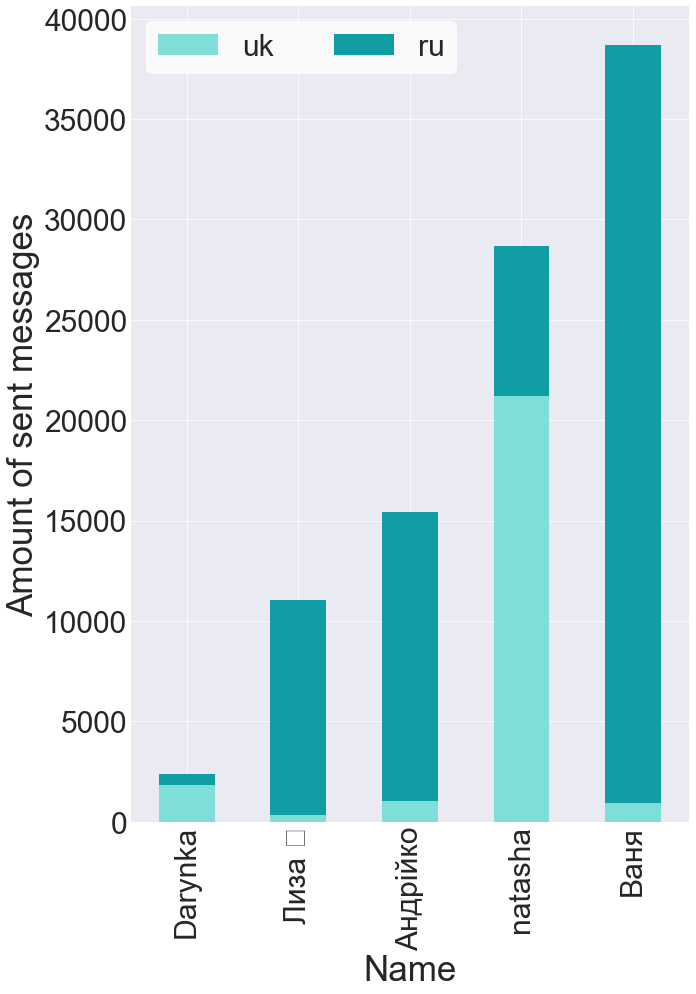

In [354]:
language_use_df.plot(kind='bar', stacked=True, color=['#80DED9', '#119DA4'])
plt.xlabel('Name', fontsize=35)
plt.ylabel('Amount of sent messages', fontsize = 35)
legend = plt.legend(loc="upper left", ncol = 2, frameon = 1)
frame = legend.get_frame()
frame.set_color('white')

- відсоток вживаності

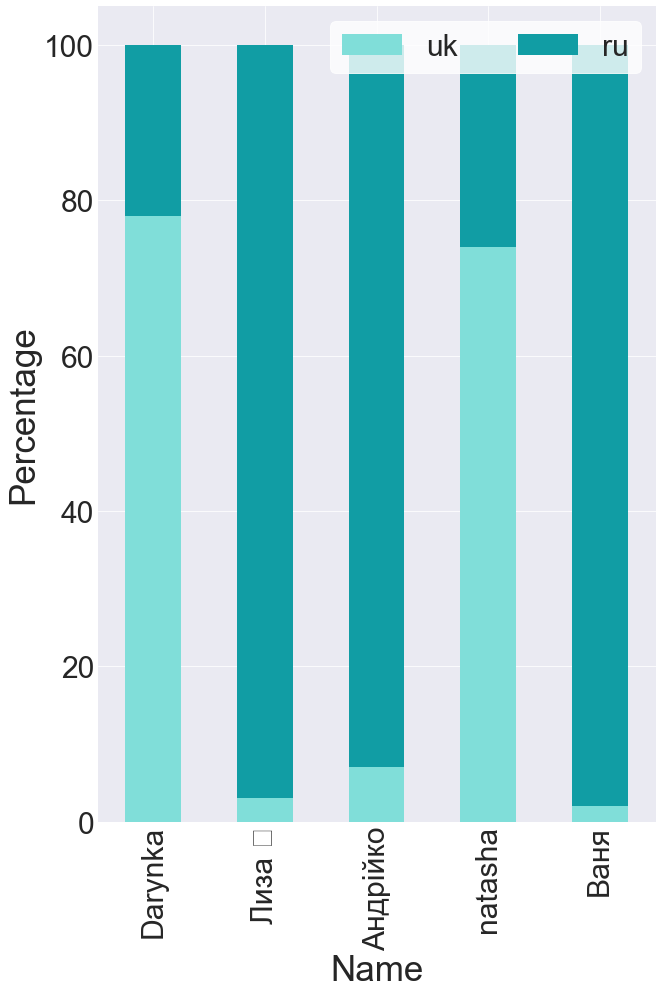

In [355]:
df_new.plot(kind='bar', stacked = True, color=['#80DED9', '#119DA4'])
plt.xlabel('Name', fontsize=35)
plt.ylabel('Percentage', fontsize = 35)
legend = plt.legend(loc="upper right", ncol = 2, frameon = 1)
frame = legend.get_frame()
frame.set_color('white')

### 14. Кількість відправників, у яких домінує російська або українська мова у спілкуванні

- приватні чати

In [356]:
top_private_chats = df_merged[(df_merged['type_dialog']=='Private dialog')].groupby(["dialog_id"])["message"].count().sort_values(ascending = False)
people_lang = df_lang.loc[(df_lang['dialog_id'].isin(top_private_chats.keys())) & (df_lang['from_id'] != 'PeerUser(user_id=342667961)')]
people_lang = people_lang[(people_lang['dialog_id']!=1419351245)|(~people_lang['from_id'].isnull())]
    
names = []
ru = []
uk = []

for dialog in people_lang['dialog_id'].unique():
    names.append(get_name(dialog))
    ru.append(df_lang[(df_lang['dialog_id']==dialog) & (df_lang['lang']=='ru')]['message'].count())
    uk.append(df_lang[(df_lang['dialog_id']==dialog) & (df_lang['lang']=='uk')]['message'].count())
    
people_lang_df = pd.DataFrame({'name':names, 'uk':uk, 'ru':ru})

In [357]:
people_lang_df['total']=people_lang_df['uk'] + people_lang_df['ru']

In [358]:
mostly_ukrainian = people_lang_df[people_lang_df['uk']/people_lang_df['total'] >= 0.65]
mostly_russian = people_lang_df[people_lang_df['ru']/people_lang_df['total'] >= 0.65]
equally = people_lang_df[(people_lang_df['uk']/people_lang_df['total'] < 0.55 ) & (people_lang_df['uk']/people_lang_df['total'] > 0.45 )]

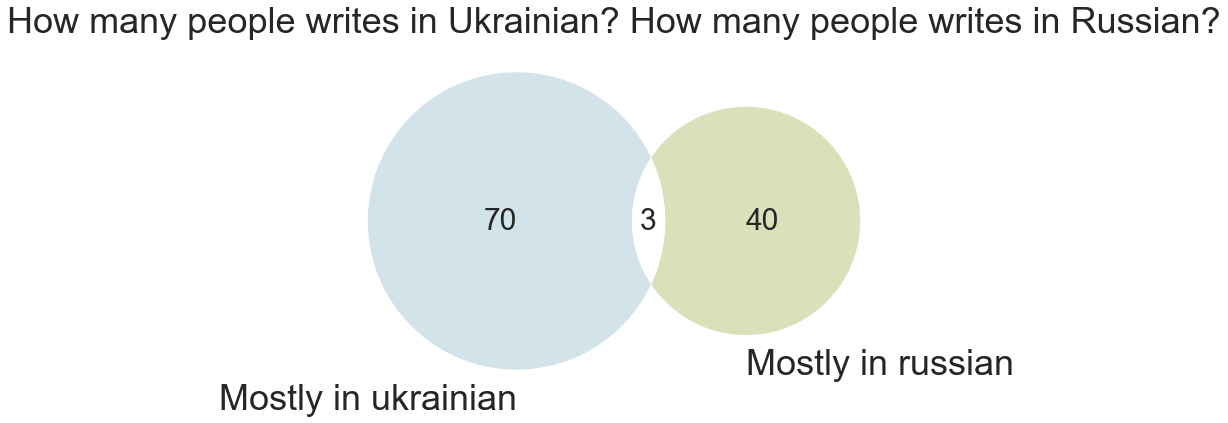

In [359]:
venn2(subsets = (mostly_ukrainian['total'].count(), mostly_russian['total'].count(),equally['total'].count()),
      set_labels = ('Mostly in ukrainian', 'Mostly in russian'),
      set_colors=( "#C0D8E0", "#CAD49D"),alpha=0.7)
plt.title('How many people writes in Ukrainian? How many people writes in Russian?')
plt.show()

- усі відправники

In [360]:
names = []
ru = []
uk = []

for from_id in df_lang['from_id'].unique():
    if from_id!='nan' and from_id!='PeerUser(user_id=1419351245)':
        names.append(from_id)
        ru.append(df_lang[(df_lang['from_id']==from_id) & (df_lang['lang']=='ru')]['message'].count())
        uk.append(df_lang[(df_lang['from_id']==from_id) & (df_lang['lang']=='uk')]['message'].count())
    
people_chats_lang_df = pd.DataFrame({'name':names, 'uk':uk, 'ru':ru})

In [361]:
people_chats_lang_df=pd.read_csv('D:/Naukma/DS/Hw/people_chats_lang_df')
people_chats_lang_df['total'] = people_chats_lang_df['uk'] + people_chats_lang_df['ru']

In [362]:
mostly_ukrainian = people_chats_lang_df[people_chats_lang_df['uk']/people_chats_lang_df['total'] >= 0.65]
mostly_russian = people_chats_lang_df[people_chats_lang_df['ru']/people_chats_lang_df['total'] >= 0.65]
equally = people_chats_lang_df[(people_chats_lang_df['uk']/people_chats_lang_df['total'] < 0.55 ) & (people_chats_lang_df['uk']/people_chats_lang_df['total'] > 0.45 )]

In [363]:
mostly_ukrainian = mostly_ukrainian['name'].count()
mostly_russian = mostly_russian['name'].count()
equally = equally['name'].count()

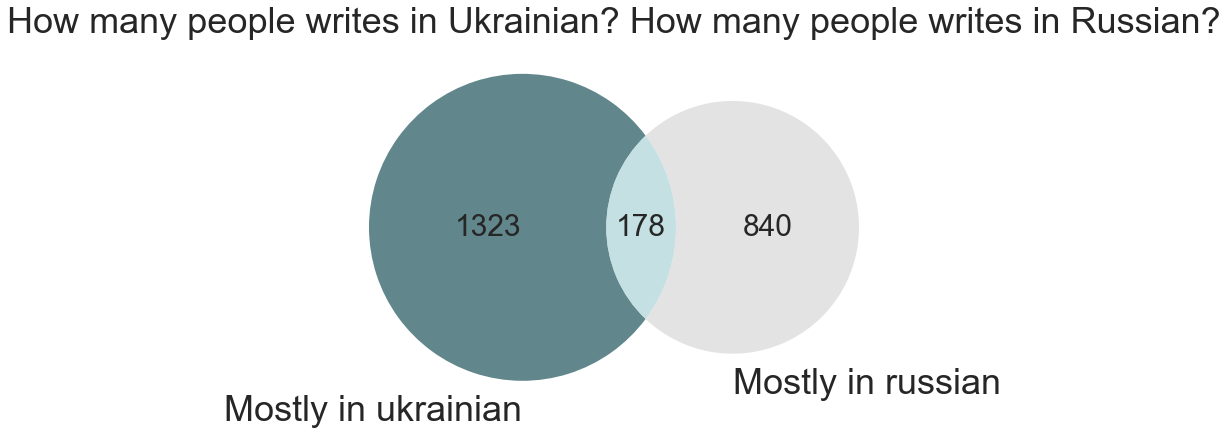

In [364]:
venn2(subsets = (mostly_ukrainian, mostly_russian, equally),
      set_labels = ('Mostly in ukrainian', 'Mostly in russian'),
      set_colors=( "#1E555C", "#D8D8D8"),alpha=0.7)
plt.title('How many people writes in Ukrainian? How many people writes in Russian?')
plt.show()

### 15. Як змінювався відсоток повідомлень українською за місяцями?

#### 15.1 мої повідомлення 

In [365]:
df_lang['date.date'] = pd.to_datetime(df_lang['date.date']).dt.date

start = dt.date(year=2020, month=1, day=1)
end = start + relativedelta(months=+1)

percentage = []
ru = []
uk = []
while start < max_date:
    my_lang = df_lang[(df_lang.from_id == my_id) & (df_lang['date.date'] >= start) & (df_lang['date.date']<end)]
    ru.append(my_lang[my_lang['lang']=='ru']['message'].count())
    uk.append(my_lang[my_lang['lang']=='uk']['message'].count())
    start=end
    end=end+relativedelta(months=+1)

In [156]:
monthly_changes_lang_df = pd.DataFrame({'ru':ru, 'uk':uk})
monthly_changes_lang_df['total']=monthly_changes_lang_df['uk'] + monthly_changes_lang_df['ru']
monthly_changes_lang_df['ru_percentage']=round((monthly_changes_lang_df['ru']/monthly_changes_lang_df['total'])*100)
monthly_changes_lang_df['uk_percentage']=round((monthly_changes_lang_df['uk']/monthly_changes_lang_df['total'])*100)
monthly_changes_lang_df['columns'] = columns
monthly_changes_lang_df.set_index('columns')

,ru,uk,total,ru_percentage,uk_percentage
columns,,,,,
2020 Jan,102,42,144,71.0,29.0
2020 February,181,24,205,88.0,12.0
2020 March,757,57,814,93.0,7.0
2020 April,362,41,403,90.0,10.0
2020 May,213,15,228,93.0,7.0
2020 June,371,34,405,92.0,8.0
2020 July,450,72,522,86.0,14.0
2020 August,556,49,605,92.0,8.0
2020 September,1718,763,2481,69.0,31.0


На мою думку, даний ідентифікатор мов недостатньо добре впорався зі своїм завданням, адже відсотки мали б вийти трохи інші( я не листувалася російською від початку війни). Тому я вирішила перевірити, як спрацював інший з lang_detect

In [157]:
langue_df = pd.read_csv("D:/Naukma/DS/Hw/langue_df")
langue_df['date.date'] = pd.to_datetime(langue_df['date.date']).dt.date

start = dt.date(year=2020, month=1, day=1)
end = start + relativedelta(months=+1)

percentage = []
ru = []
uk = []
while start < max_date:
    month = langue_df[(langue_df.from_id == my_id) & (langue_df['date.date'] >= start) & (langue_df['date.date']<end)]
    ru.append(month[month['langue']=='ru']['message'].count())
    uk.append(month[month['langue']=='uk']['message'].count())
    start=end
    end=end+relativedelta(months=+1)

In [160]:
monthly_changes_lang_df = pd.DataFrame({'ru':ru, 'uk':uk})
monthly_changes_lang_df['total']=monthly_changes_lang_df['uk'] + monthly_changes_lang_df['ru']
monthly_changes_lang_df['ru_percentage']=round((monthly_changes_lang_df['ru']/monthly_changes_lang_df['total'])*100)
monthly_changes_lang_df['uk_percentage']=round((monthly_changes_lang_df['uk']/monthly_changes_lang_df['total'])*100)
monthly_changes_lang_df['columns'] = columns
monthly_changes_lang_df.set_index('columns')

,ru,uk,total,ru_percentage,uk_percentage
columns,,,,,
2020 Jan,68,52,120,57.0,43.0
2020 February,127,46,173,73.0,27.0
2020 March,587,105,692,85.0,15.0
2020 April,294,54,348,84.0,16.0
2020 May,175,21,196,89.0,11.0
2020 June,295,63,358,82.0,18.0
2020 July,338,117,455,74.0,26.0
2020 August,419,92,511,82.0,18.0
2020 September,1258,867,2125,59.0,41.0


Цей ідентифікатор мов також працює не на найвищому рівні, коли ідентифікує російську і українську мови, як бачимо. Однією з причин, чому я вирішила використати ідентифікатор мов spacy_fastlang, було те, що lang_detect ідентифікував з-поміж повідомлень у датасеті 76 тисяч повідомлень болгарською😐, тобто мовою, якою я ніколи не листувалася. Тому, напевно, в даному запитанні я використаю датасет, що був ідентифікованим lang_detect, бо я знаю/впевнена, що ці відсотки ближче до правди. Та інші завдання залишу з використанням spacy_fastlang, адже він не ідентифікував 70000 повідомлень як болгарську мову.

In [142]:
columns_numeric = ['2020.01', '2020.02', '2020.03', '2020.04', '2020.05',
           '2020.06', '2020.07', '2020.08', '2020.09',
           '2020.10', '2020.11', '2020.12',
           '2021.01', '2021.02', '2021.03', '2021.04', '2021.05',
           '2021.06', '2021.07', '2021.08', '2021.09',
           '2021.10', '2021.11', '2021.12',
           '2022.01', '2022.02', '2022.03','2022.04']

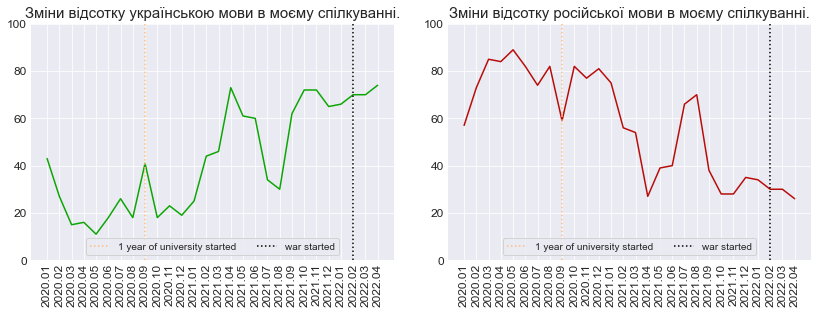

In [210]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(monthly_changes_lang_df['uk_percentage'].transpose(), color='#0BA603')
axes[0].set_title('Зміни відсотку українською мови в моєму спілкуванні.', fontsize = 15)
axes[0].set_xticks(range(0,28))
axes[0].set_yticks(range(0,101,20))
axes[0].set_xticklabels(columns_numeric, fontsize=12, rotation=90)
axes[0].set_yticklabels(range(0,101,20), fontsize=12)
axes[0].axvline(x = 8, linestyle =':', color = '#FFBF81', label = '1 year of university started')
axes[0].axvline(x = 25, linestyle =':', color = '#000000', label = 'war started')
axes[0].legend(loc = "lower center", frameon = True, fontsize = 10, ncol=2 )

axes[1].plot(monthly_changes_lang_df['ru_percentage'].transpose(), color='#B80C09')
axes[1].set_title('Зміни відсотку російської мови в моєму спілкуванні.', fontsize = 15)
axes[1].set_xticks(range(0,28))
axes[1].set_yticks(range(0,101,20))
axes[1].set_xticklabels(columns_numeric, fontsize=12, rotation=90)
axes[1].set_yticklabels(range(0,101,20), fontsize=12)
axes[1].axvline(x = 8, linestyle =':', color = '#FFBF81', label = '1 year of university started')
axes[1].axvline(x = 25, linestyle =':', color = '#000000', label = 'war started')
axes[1].legend(loc = "lower center", frameon = True, fontsize = 10, ncol=2 )


plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)

#### 15.2 Усі повідомлення

In [215]:
start = dt.date(year=2020, month=1, day=1)
end = start + relativedelta(months=+1)

percentage = []
ru = []
uk = []
while start < max_date:
    month = langue_df[(langue_df['from_id']!=my_id) & (langue_df['date.date'] >= start) & (langue_df['date.date']<end)]
    ru.append(month[month['langue']=='ru']['message'].count())
    uk.append(month[month['langue']=='uk']['message'].count())
    start=end
    end=end+relativedelta(months=+1)

In [216]:
monthly_changes_lang_df = pd.DataFrame({'ru':ru, 'uk':uk})
monthly_changes_lang_df['total']=monthly_changes_lang_df['uk'] + monthly_changes_lang_df['ru']
monthly_changes_lang_df['ru_percentage']=round((monthly_changes_lang_df['ru']/monthly_changes_lang_df['total'])*100)
monthly_changes_lang_df['uk_percentage']=round((monthly_changes_lang_df['uk']/monthly_changes_lang_df['total'])*100)
monthly_changes_lang_df['columns'] = columns
monthly_changes_lang_df.set_index('columns')

,ru,uk,total,ru_percentage,uk_percentage
columns,,,,,
2020 Jan,520,1398,1918,27.0,73.0
2020 February,950,1535,2485,38.0,62.0
2020 March,1054,1750,2804,38.0,62.0
2020 April,877,1619,2496,35.0,65.0
2020 May,645,1439,2084,31.0,69.0
2020 June,441,1362,1803,24.0,76.0
2020 July,410,1204,1614,25.0,75.0
2020 August,889,1448,2337,38.0,62.0
2020 September,4980,6417,11397,44.0,56.0


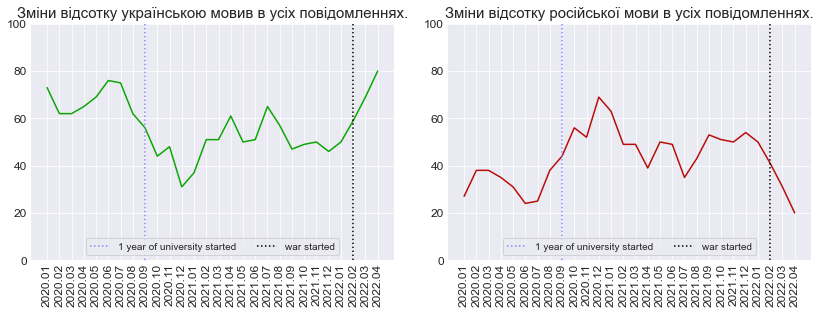

In [393]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(monthly_changes_lang_df['uk_percentage'].transpose(), color='#0BA603')
axes[0].set_title('Зміни відсотку українською мовив в усіх повідомленнях.', fontsize = 15)
axes[0].set_xticks(range(0,28))
axes[0].set_yticks(range(0,101,20))
axes[0].set_xticklabels(columns_numeric, fontsize=12, rotation=90)
axes[0].set_yticklabels(range(0,101,20), fontsize=12)
axes[0].axvline(x = 8, linestyle =':', color = '#8884FF', label = '1 year of university started')
axes[0].axvline(x = 25, linestyle =':', color = '#000000', label = 'war started')
axes[0].legend(loc = "lower center", frameon = True, fontsize = 10, ncol=2 )

axes[1].plot(monthly_changes_lang_df['ru_percentage'].transpose(), color='#B80C09')
axes[1].set_title('Зміни відсотку російської мови в усіх повідомленнях.', fontsize = 15)
axes[1].set_xticks(range(0,28))
axes[1].set_yticks(range(0,101,20))
axes[1].set_xticklabels(columns_numeric, fontsize=12, rotation=90)
axes[1].set_yticklabels(range(0,101,20), fontsize=12)
axes[1].axvline(x = 8, linestyle =':', color = '#8884FF', label = '1 year of university started')
axes[1].axvline(x = 25, linestyle =':', color = '#000000', label = 'war started')
axes[1].legend(loc = "lower center", frameon = True, fontsize = 10, ncol=2 )


plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)

### 16. Зміна відсотку російськомовних та україномовних відправників повідомлень з часом/корреляція з війною та вступом у Могилянку

In [284]:
def define_language(df_lang):
    names = []
    ru = []
    uk = []

    for from_id in df_lang['from_id'].unique():
        if from_id!='nan' and from_id!='PeerUser(user_id=1419351245)':
            names.append(from_id)
            ru.append(df_lang[(df_lang['from_id']==from_id) & (df_lang['lang']=='ru')]['message'].count())
            uk.append(df_lang[(df_lang['from_id']==from_id) & (df_lang['lang']=='uk')]['message'].count())
    
    people_chats_lang_df = pd.DataFrame({'name':names, 'uk':uk, 'ru':ru})
    people_chats_lang_df['total'] = people_chats_lang_df['uk'] + people_chats_lang_df['ru']
    mostly_ukrainian = people_chats_lang_df[people_chats_lang_df['uk']/people_chats_lang_df['total'] >= 0.65]
    mostly_russian = people_chats_lang_df[people_chats_lang_df['ru']/people_chats_lang_df['total'] >= 0.65]
    equally = people_chats_lang_df[(people_chats_lang_df['uk']/people_chats_lang_df['total'] < 0.55 ) & (people_chats_lang_df['uk']/people_chats_lang_df['total'] > 0.45 )]
    mostly_ukrainian = mostly_ukrainian['name'].count()
    mostly_russian = mostly_russian['name'].count()
    equally = equally['name'].count()
    return mostly_ukrainian, mostly_russian, equally

In [286]:
start = dt.date(year=2020, month=1, day=1)
end = start + relativedelta(months=+1)

equal = []
russian = []
ukrainian = []

while start < max_date:
    my_lang = df_lang[(df_lang['date.date'] >= start) & (df_lang['date.date']<end)]
    uk, ru, eq = define_language(my_lang)
    equal.append(eq)
    russian.append(ru)
    ukrainian.append(uk)
    start=end
    end=end+relativedelta(months=+1)
    
result = pd.DataFrame({'uk':ukrainian, 'ru':russian, 'eq':equal})

,uk,ru,eq
0,46,67,12
1,64,104,9
2,59,89,7
3,22,37,3
4,39,56,3
5,37,40,4
6,29,27,1
7,39,69,3
8,103,82,10
9,82,88,12


In [322]:
#result.to_csv("D:/Naukma/DS/Hw/langues_months")
result['total']=result['uk'] + result['ru'] + result['eq']
result['ru_percentage']=round((result['ru']/result['total'])*100)
result['uk_percentage']=round((result['uk']/result['total'])*100)
result['eq_percentage']=round((result['eq']/result['total'])*100)
result['columns'] = columns
result.set_index('columns')

,uk,ru,eq,total,ru_percentage,uk_percentage,eq_percentage
columns,,,,,,,
2020 Jan,46,67,12,125,54.0,37.0,10.0
2020 February,64,104,9,177,59.0,36.0,5.0
2020 March,59,89,7,155,57.0,38.0,5.0
2020 April,22,37,3,62,60.0,35.0,5.0
2020 May,39,56,3,98,57.0,40.0,3.0
2020 June,37,40,4,81,49.0,46.0,5.0
2020 July,29,27,1,57,47.0,51.0,2.0
2020 August,39,69,3,111,62.0,35.0,3.0
2020 September,103,82,10,195,42.0,53.0,5.0


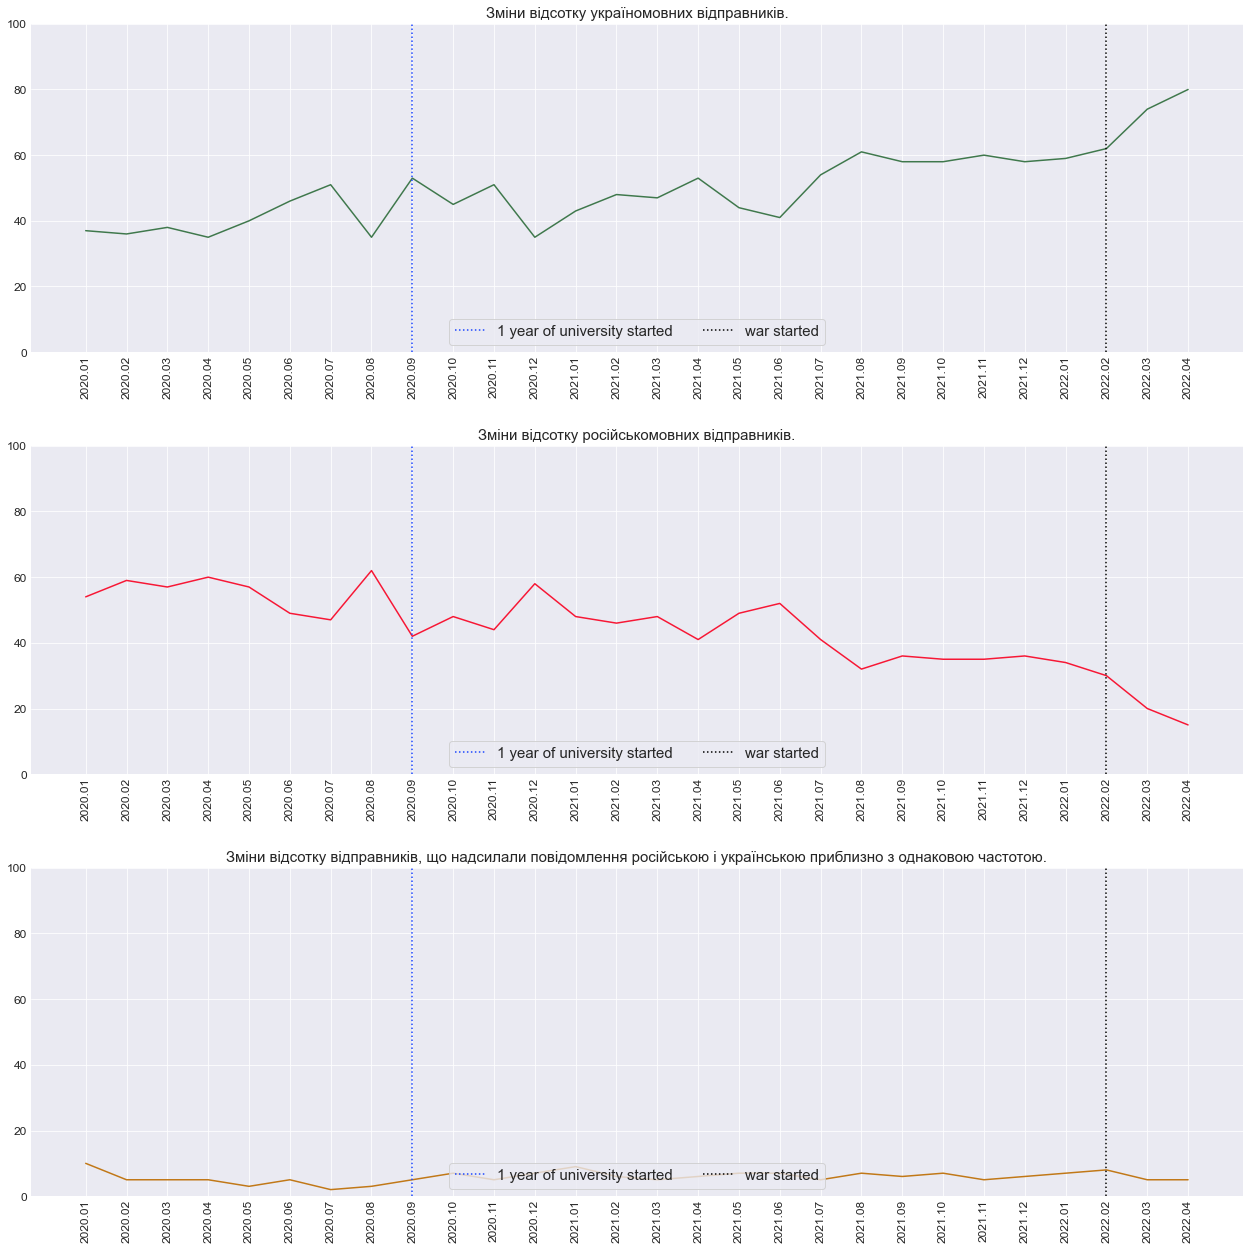

In [308]:
fig, axes = plt.subplots(3, 1, figsize=(18, 18))

axes[0].plot(result['uk_percentage'].transpose(), color='#3F784C')
axes[0].set_title('Зміни відсотку україномовних відправників.', fontsize = 15)
axes[0].set_xticks(range(0,28))
axes[0].set_yticks(range(0,101,20))
axes[0].set_xticklabels(columns_numeric, fontsize=12, rotation=90)
axes[0].set_yticklabels(range(0,101,20), fontsize=12)
axes[0].axvline(x = 8, linestyle =':', color = '#1A44FF', label = '1 year of university started')
axes[0].axvline(x = 25, linestyle =':', color = '#000000', label = 'war started')
axes[0].legend(loc = "lower center", frameon = True, fontsize = 15, ncol=2 )

axes[1].plot(result['ru_percentage'].transpose(), color='#F71735')
axes[1].set_title('Зміни відсотку російськомовних відправників.', fontsize = 15)
axes[1].set_xticks(range(0,28))
axes[1].set_yticks(range(0,101,20))
axes[1].set_xticklabels(columns_numeric, fontsize=12, rotation=90)
axes[1].set_yticklabels(range(0,101,20), fontsize=12)
axes[1].axvline(x = 8, linestyle =':', color = '#1A44FF', label = '1 year of university started')
axes[1].axvline(x = 25, linestyle =':', color = '#000000', label = 'war started')
axes[1].legend(loc = "lower center", frameon = True, fontsize = 15, ncol=2 )

axes[2].plot(result['eq_percentage'].transpose(), color='#C17817')
axes[2].set_title('Зміни відсотку відправників, що надсилали повідомлення російською і українською приблизно з однаковою частотою.', fontsize = 15)
axes[2].set_xticks(range(0,28))
axes[2].set_yticks(range(0,101,20))
axes[2].set_xticklabels(columns_numeric, fontsize=12, rotation=90)
axes[2].set_yticklabels(range(0,101,20), fontsize=12)
axes[2].axvline(x = 8, linestyle =':', color = '#1A44FF', label = '1 year of university started')
axes[2].axvline(x = 25, linestyle =':', color = '#000000', label = 'war started')
axes[2].legend(loc = "lower center", frameon = True, fontsize = 15, ncol=2 )


plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)

## 17. Сентименти у повідомленнях 

In [127]:
from utils.dict_manipulation import get_ua_tonality_dict_combined, get_ru_tonality_dict
from utils.date import get_day_and_hour, get_week_day_from_number
from plotly.subplots import make_subplots

In [128]:
def calculate_msg_sentiment(msg, lang):
    if not isinstance(msg, str):
        return 0
    elif lang == "uk":
        tonality_dict = tonality_dict_ua
    elif lang == "ru":
        tonality_dict = tonality_dict_ru
    tokenized_msg = msg.split()
    overall_sentiment = 0
    words_num = 0
    for token in tokenized_msg:
        token_sentiment = tonality_dict.get(token.lower(), 0)
        if token_sentiment:
            overall_sentiment += token_sentiment
    words_num += 1
    avg_sentiment = overall_sentiment / words_num
    return avg_sentiment


def add_dialog_sentiment(data):
    data['sentiment'] = data.apply(lambda x: calculate_msg_sentiment(x['message'], x['lang']),axis=1)
    return data

def calculate_avg_subdialog_sentiment(data):
    grouped_data = sentiment_data_for_each_msg.groupby(
        [sentiment_data_for_each_msg['from_id'].fillna('-'),
         sentiment_data_for_each_msg['dialog_id']])
    data['avg_subdialog_sentiment'] = round(grouped_data['sentiment'].transform(lambda x: x.mean()),3)
    return data

def calculate_dialog_sentiment(data):
    grouped_data = sentiment_data_for_each_msg.groupby(
         sentiment_data_for_each_msg['dialog_id'])
    data['avg_dialog_sentiment'] = round(grouped_data['sentiment'].transform(lambda x: x.mean()),3)
    return data


def add_hour_and_dayoweek(data):
    data[['hour_of_day', 'day_of_week']] = data.apply(lambda x: get_day_and_hour(x['date']), axis=1,result_type="expand")
    return data

def analyze_sentiment_for_hour_and_dayoweek(data_with_hour_and_week):
    grouped_by_date = data_with_hour_and_week.groupby(['from_id', 'day_of_week', 'hour_of_day'])
    finalized_data = grouped_by_date['avg_dialog_sentiment'].mean().round(3).reset_index()
    return finalized_data

def analyze_sentiment_for_hour_and_dayoweek2(data_with_hour_and_week):
    grouped_by_date = data_with_hour_and_week.groupby(['from_id', 'day_of_week', 'hour_of_day'])
    finalized_data = grouped_by_date['avg_subdialog_sentiment'].mean().round(3).reset_index()
    return finalized_data

In [129]:
tonality_dict_ua = get_ua_tonality_dict_combined()
tonality_dict_ru = get_ru_tonality_dict()

In [133]:
df_lang = df_lang[df_lang['lang'].isin(['ru','uk'])]
sentiment_data_for_each_msg = add_dialog_sentiment(df_lang)
dialog_sentiment_data = calculate_dialog_sentiment(sentiment_data_for_each_msg)
data_with_hour_and_week = add_hour_and_dayoweek(dialog_sentiment_data)
final_sentiment_data = analyze_sentiment_for_hour_and_dayoweek(data_with_hour_and_week)

In [136]:
sentiment_data_for_each_msg.to_csv("D:/Naukma/DS/Hw/sentiments")

In [138]:
sentiment_data_for_each_msg['date.date'] = pd.to_datetime(sentiment_data_for_each_msg['date.date']).dt.date

#### по місяцям

In [139]:
start = dt.date(year=2020, month=1, day=1)
end = start + relativedelta(months=+1)


means = []
while start < max_date:
    month = sentiment_data_for_each_msg[(sentiment_data_for_each_msg['from_id'] == my_id) & (sentiment_data_for_each_msg['date.date'] >= start) & (sentiment_data_for_each_msg['date.date']<end)]
    month_mean = month['sentiment'].mean()
    means.append(month_mean)
    start=end
    end=end+relativedelta(months=+1)

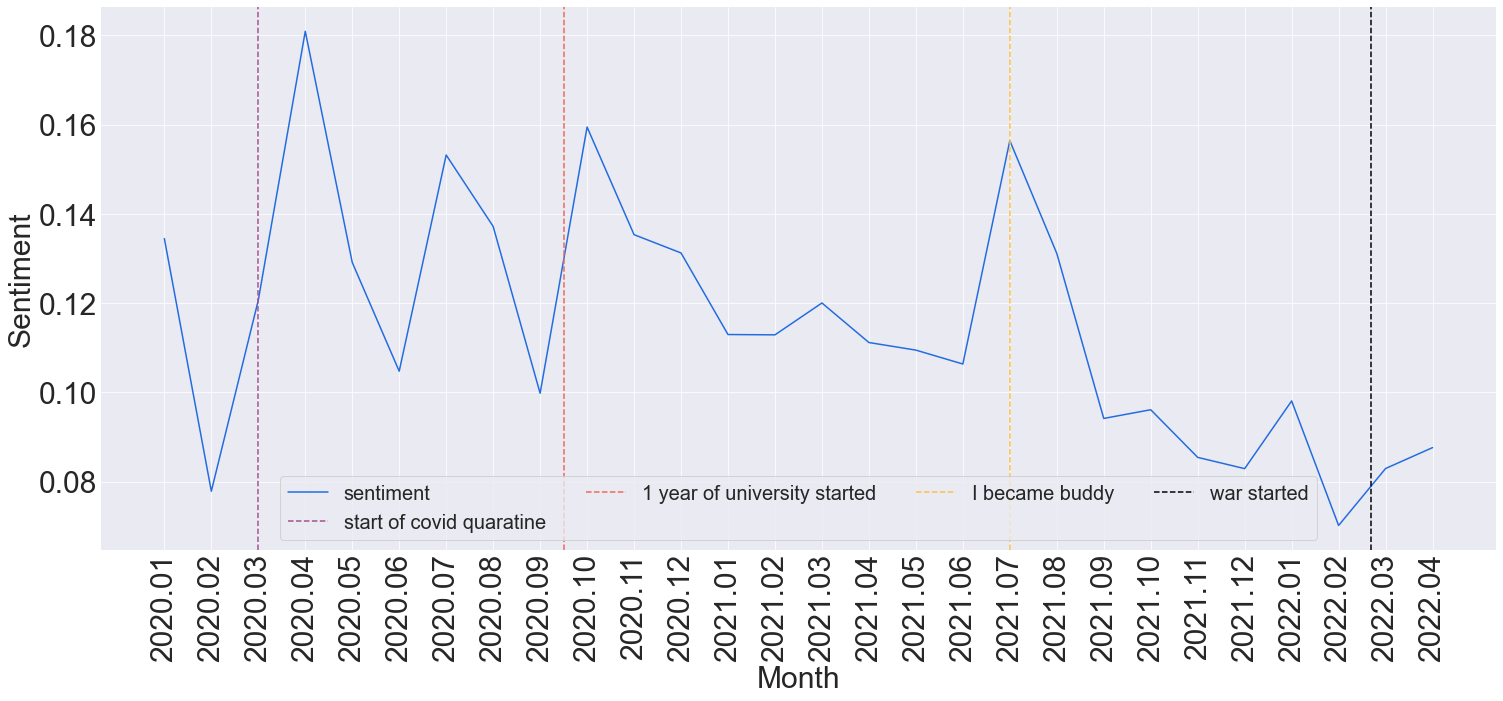

In [168]:
months_sentiment_df = pd.DataFrame({'sentiment':means})
months_sentiment_df.plot(color='#226CE0')
plt.xticks(range(0,28), columns_numeric, rotation = 90)
plt.xlabel('Month')
plt.ylabel('Sentiment')
plt.rcParams["figure.figsize"] = (25, 10)
plt.axvline(x = 2, linestyle ='--', color = '#A4508B', label = 'start of covid quaratine')
plt.axvline(x = 8.5, linestyle ='--', color = '#ED6A5A', label = '1 year of university started')
plt.axvline(x = 18, linestyle ='--', color = '#FFC145', label = 'I became buddy')
plt.axvline(x = 25.7, linestyle ='--', color = '#000000', label = 'war started')
plt.legend(loc = "lower center", frameon = True, fontsize = 20, ncol=4 )